# Part One: Cleaning Data and Preprocessing

In [3]:
import numpy as np 
import pandas as pd 

In [2]:
df_agricultural = pd.read_csv('Agricultural_data/consolidado1.csv')

In [3]:
df_agricultural.head()

,date,year month,price_soybean,Brazil-Tmin,Brazil-Tmax,Brazil-T mean,Brazil-Precipitation,ARGENTINA-Tmin,ARGENTINA-Tmax,ARGENTINA T Mean,...,price_wti_oil,price_corn,price_wheat,SOYBEANS - USA PRODUCTION [mTons],SOYBEANS - India PRODUCTION [mTons],SOYBEANS - Brazil PRODUCTION [mTons],SOYBEANS - Argentina PRODUCTION [mTons],SOYBEANS - EU PRODUCTION [mTons],SOYBEANS - China PRODUCTION [mTons],SOYBEANS - USA Stocks [mTons]
0,7/1/1988,07-1988,787.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,42.153,1.547,23.600,9.9,NaN,NaN,8232.0
1,8/1/1988,08-1988,867.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,42.153,1.547,23.600,9.9,NaN,NaN,8232.0
2,9/1/1988,09-1988,813.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,42.153,1.547,23.600,9.9,NaN,NaN,8232.0
3,10/3/1988,10-1988,789.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,42.153,1.547,23.600,9.9,NaN,NaN,37199.0
4,11/1/1988,11-1988,763.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,42.153,1.547,23.600,9.9,NaN,NaN,37199.0


In [4]:
data = df_agricultural.copy()

In [5]:
duplicate_count = len(data) - len(data.drop_duplicates()) 
duplicate_count

0

In [6]:
round(data.isnull().sum().sort_values(ascending=False)/len(data),2)

usa_gdp_pp                                 0.92
eur_gdp_pp                                 0.92
china_gdp_pp                               0.92
SOYBEANS - EU PRODUCTION [mTons]           0.31
SOYBEANS - China PRODUCTION [mTons]        0.31
price_wti_oil                              0.31
meat_price_index                           0.29
world_food_price_index                     0.29
price_wheat                                0.29
price_corn                                 0.29
SP500                                      0.24
price_gold                                 0.14
DXY                                        0.13
VIX                                        0.04
ARGENTINA Precipitation                    0.03
ARGENTINA-Tmax                             0.03
ARGENTINA-Tmin                             0.03
Brazil-Precipitation                       0.03
Brazil-T mean                              0.03
Brazil-Tmax                                0.03
Brazil-Tmin                             

## Preprocessing climate features

In [7]:
data = data.rename(index=str, columns={"Avg Temperature USA Decatur, IL (°C)": "Avg_Temperature_USA", "Precipitation USA Decatur, IL (mm)":'Precipitation_USA'})

In [8]:
data.Avg_Temperature_USA.value_counts(dropna=False)

Avg_Temperature_USA
M        12
22.67     5
24.39     5
24.61     5
23.06     4
         ..
25        1
0.5       1
-4.44     1
-2.17     1
12.33     1
Name: count, Length: 294, dtype: int64

In [9]:
data.Avg_Temperature_USA.replace("M",np.nan, inplace=True)
data.Avg_Temperature_USA.value_counts(dropna=False)

Avg_Temperature_USA
NaN      12
22.67     5
24.39     5
24.61     5
23.06     4
         ..
25        1
0.5       1
-4.44     1
-2.17     1
12.33     1
Name: count, Length: 294, dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # Instanciate a SimpleImputer object with strategy of choice

imputer.fit(data[['Avg_Temperature_USA']]) # Call the "fit" method on the object

data['Avg_Temperature_USA'] = imputer.transform(data[['Avg_Temperature_USA']]) 

In [11]:
data.Precipitation_USA.replace("M",np.nan, inplace=True)
data.Precipitation_USA.value_counts(dropna=False)

Precipitation_USA
NaN        25
32.258      5
65.532      4
77.724      4
58.928      3
           ..
104.394     1
85.344      1
57.15       1
148.336     1
49.022      1
Name: count, Length: 299, dtype: int64

In [12]:
imputer = SimpleImputer(strategy="median") # Instanciate a SimpleImputer object with strategy of choice

imputer.fit(data[['Precipitation_USA']]) # Call the "fit" method on the object

data['Precipitation_USA'] = imputer.transform(data[['Precipitation_USA']]) 

In [ ]:
data.to_csv("Agricultural_data/consolidado2.csv", index=False)

# Part Two: Scaling

## Importing data from the preprocessed consolidated data set

In [194]:
df_final_agricultural = pd.read_csv('Agricultural_data/consolidado_final.csv')

In [195]:
df_final_agricultural.head()

,date,year month,price_soybean,Brazil-Tmin,Brazil-Tmax,Brazil-T mean,Brazil-Precipitation,ARGENTINA-Tmin,ARGENTINA-Tmax,ARGENTINA T Mean,...,price_gold,SP500,VIX,price_wti_oil,price_corn,price_wheat,SOYBEANS - USA PRODUCTION [mTons],SOYBEANS - Brazil PRODUCTION [mTons],SOYBEANS - Argentina PRODUCTION [mTons],SOYBEANS - USA Stocks [mTons]
0,7/1/1988,07-1988,787.50,16.0,26.1,21.05,30,3.0,14.2,8.60,...,436.1,326.2,25.36,14.21,217.25,252.5,42.153,23.600,9.9,"8,232"
1,8/1/1988,08-1988,867.50,17.6,28.8,23.20,34,6.8,17.3,12.05,...,429.3,326.2,25.36,14.21,217.25,252.5,42.153,23.600,9.9,"8,232"
2,9/1/1988,09-1988,813.00,19.6,30.4,25.00,92,5.4,18.1,11.75,...,394.4,326.2,25.36,14.21,217.25,252.5,42.153,23.600,9.9,"8,232"
3,10/3/1988,10-1988,789.25,21.2,30.2,25.70,151,8.7,21.9,15.30,...,412.7,326.2,25.36,14.21,217.25,252.5,42.153,23.600,9.9,"37,199"
4,11/1/1988,11-1988,763.75,21.2,29.2,25.20,173,11.7,27.0,19.35,...,410.0,326.2,25.36,14.21,217.25,252.5,42.153,23.600,9.9,"37,199"


In [7]:
round(df_final_agricultural.isnull().sum().sort_values(ascending=False)/len(df_final_agricultural),2)

SOYBEANS - Argentina PRODUCTION [mTons]    0.01
SOYBEANS - Brazil PRODUCTION [mTons]       0.01
SOYBEANS - USA PRODUCTION [mTons]          0.01
ARGENTINA Precipitation                    0.01
SOYBEANS - USA Stocks [mTons]              0.01
meat_price_index                           0.00
world_food_price_index                     0.00
eur_gdp_pp                                 0.00
price_wheat                                0.00
price_corn                                 0.00
price_wti_oil                              0.00
VIX                                        0.00
SP500                                      0.00
price_gold                                 0.00
DXY                                        0.00
usa_gdp_pp                                 0.00
date                                       0.00
year month                                 0.00
exp_infl_1year                             0.00
real_interest_rate                         0.00
Avg Temperature USA Decatur, IL (°C)    

## Rename columns

In [23]:
df_copy_agricultural = df_final_agricultural.copy()

In [24]:
df_copy_agricultural = df_copy_agricultural.rename(index=str, columns={"Avg Temperature USA Decatur, IL (°C)": "USA_Temperature",
                                                                       "Precipitation USA Decatur, IL (mm)":'USA_Precipitation',
                                                                      "SOYBEANS - Argentina PRODUCTION [mTons]":'Argentina_Production',
                                                                      'SOYBEANS - Brazil PRODUCTION [mTons]':'Brazil_Production',
                                                                      'SOYBEANS - USA PRODUCTION [mTons]':'USA_Production',
                                                                      'ARGENTINA Precipitation':'Argentina_Precipitation',
                                                                       'Brazil-Precipitation':'Brazil_Precipitation',
                                                                      'ARGENTINA T Mean':'Argentina_Temperature',
                                                                      'Brazil-T mean':'Brazil_Temperature',
                                                                      'SOYBEANS - USA Stocks [mTons]':'USA_Stocks'})

In [25]:
df_copy_agricultural.drop(columns=['ARGENTINA-Tmax', 'ARGENTINA-Tmin', 'Brazil-Tmax', 'Brazil-Tmin', 'USA_Stocks'], inplace=True)

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # Instanciate a SimpleImputer object with strategy of choice
df_copy_agricultural['Argentina_Production'] =  imputer.fit_transform(df_copy_agricultural[['Argentina_Production']])
#df_copy_agricultural['Brazil_Production'] =  imputer.fit_transform(df_copy_agricultural[['Brazil_Production']])
#df_copy_agricultural['USA_Production'] =  imputer.fit_transform(df_copy_agricultural[['USA_Production']])
df_copy_agricultural['Argentina_Precipitation'] =  imputer.fit_transform(df_copy_agricultural[['Argentina_Precipitation']])


In [26]:
df_copy_agricultural['Brazil_Production'].describe()

count           414
unique           35
top         57.000 
freq             12
Name: Brazil_Production, dtype: object

In [78]:
#df_copy_agricultural['Brazil_Production'] = pd.to_numeric(df_copy_agricultural['Brazil_Production'], errors='coerce')

In [79]:
#df_copy_agricultural['Brazil_Production'].describe()

count    402.000000
mean      65.413134
std       40.283326
min       15.750000
25%       27.300000
50%       57.000000
75%       95.700000
max      156.000000
Name: Brazil_Production, dtype: float64

In [80]:
#df_copy_agricultural['USA_Production'] = pd.to_numeric(df_copy_agricultural['USA_Production'], errors='coerce')

In [30]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is already defined as the DataFrame containing the data

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over non-numeric columns and encode their values
for column in df_copy_agricultural.select_dtypes(exclude='number'):
    df_copy_agricultural[column] = label_encoder.fit_transform(df_copy_agricultural[column])

In [76]:
imputer = SimpleImputer(strategy="median") 
df_copy_agricultural['Brazil_Production'] =  imputer.fit_transform(df_copy_agricultural[['Brazil_Production']])
df_copy_agricultural['USA_Production'] =  imputer.fit_transform(df_copy_agricultural[['USA_Production']])
df_copy_agricultural['world_food_price_index'] =  imputer.fit_transform(df_copy_agricultural[['world_food_price_index']])
df_copy_agricultural['meat_price_index'] =  imputer.fit_transform(df_copy_agricultural[['meat_price_index']])

In [34]:
round(df_copy_agricultural.isnull().sum().sort_values(ascending=False)/len(df_copy_agricultural),2)

meat_price_index           0.0
world_food_price_index     0.0
date                       0.0
year month                 0.0
Brazil_Production          0.0
USA_Production             0.0
price_wheat                0.0
price_corn                 0.0
price_wti_oil              0.0
VIX                        0.0
SP500                      0.0
price_gold                 0.0
DXY                        0.0
usa_gdp_pp                 0.0
eur_gdp_pp                 0.0
china_gdp_pp               0.0
exp_infl_1year             0.0
real_interest_rate         0.0
USA_Temperature            0.0
USA_Precipitation          0.0
Argentina_Precipitation    0.0
Argentina_Temperature      0.0
Brazil_Precipitation       0.0
Brazil_Temperature         0.0
price_soybean              0.0
Argentina_Production       0.0
dtype: float64

In [35]:
df_copy_agricultural.head()

,date,year month,price_soybean,Brazil_Temperature,Brazil_Precipitation,Argentina_Temperature,Argentina_Precipitation,USA_Precipitation,USA_Temperature,real_interest_rate,...,DXY,price_gold,SP500,VIX,price_wti_oil,price_corn,price_wheat,USA_Production,Brazil_Production,Argentina_Production
0,315,209,787.50,21.05,30,8.60,23.8,51.562,25.39,4.43535,...,97.53,436.1,326.2,25.36,14.21,217.25,252.5,42.153,12.0,9.9
1,350,244,867.50,23.20,34,12.05,32.0,58.928,25.67,4.54274,...,97.69,429.3,326.2,25.36,14.21,217.25,252.5,42.153,12.0,9.9
2,385,279,813.00,25.00,92,11.75,57.3,77.978,20.33,4.70786,...,97.69,394.4,326.2,25.36,14.21,217.25,252.5,42.153,12.0,9.9
3,64,314,789.25,25.70,151,15.30,109.0,52.070,9.28,4.46199,...,93.76,412.7,326.2,25.36,14.21,217.25,252.5,42.153,12.0,9.9
4,70,349,763.75,25.20,173,19.35,102.1,149.860,5.89,4.35872,...,90.53,410.0,326.2,25.36,14.21,217.25,252.5,42.153,12.0,9.9


/tmp/ipykernel_28141/2723823219.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,3,figsize=(15,5))


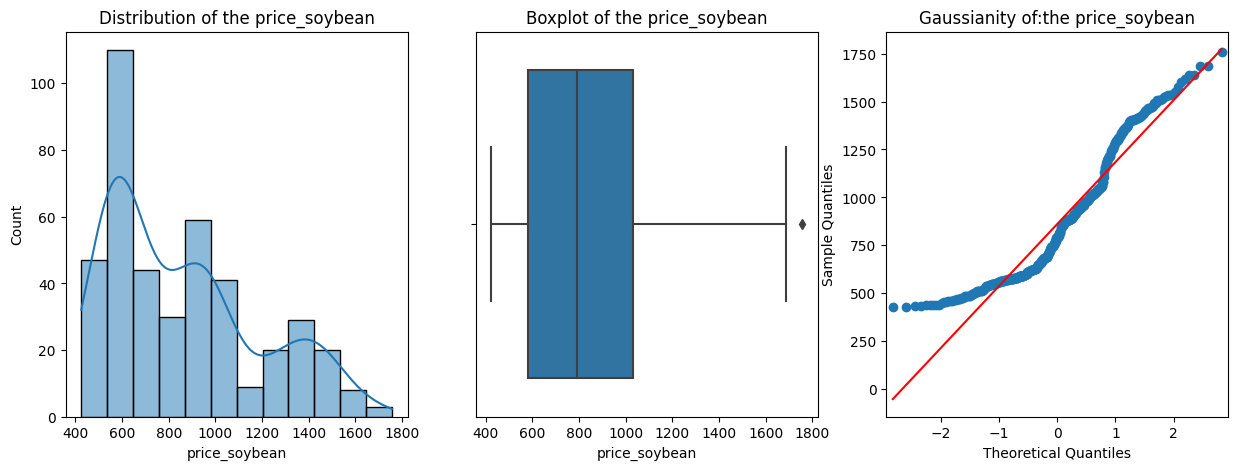

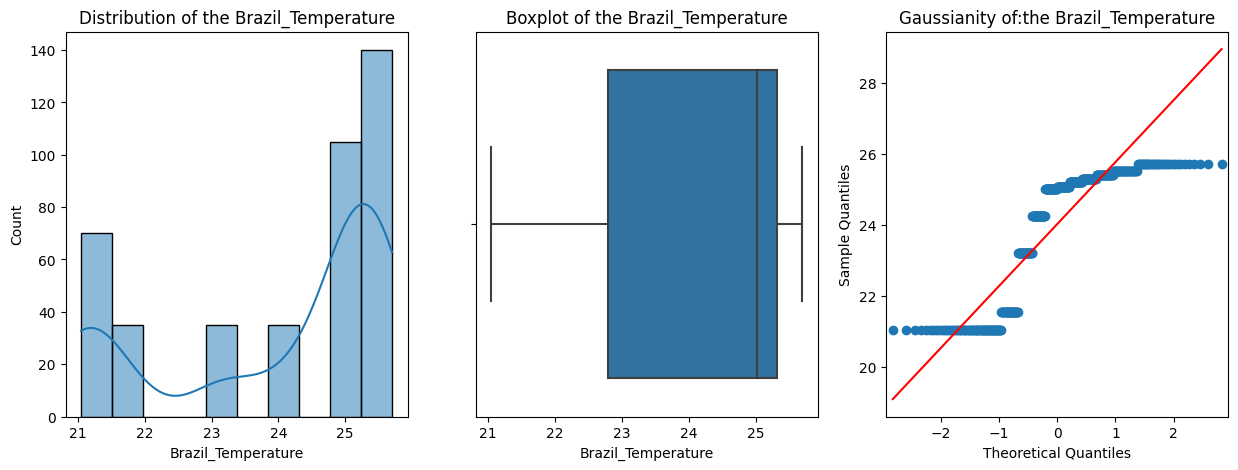

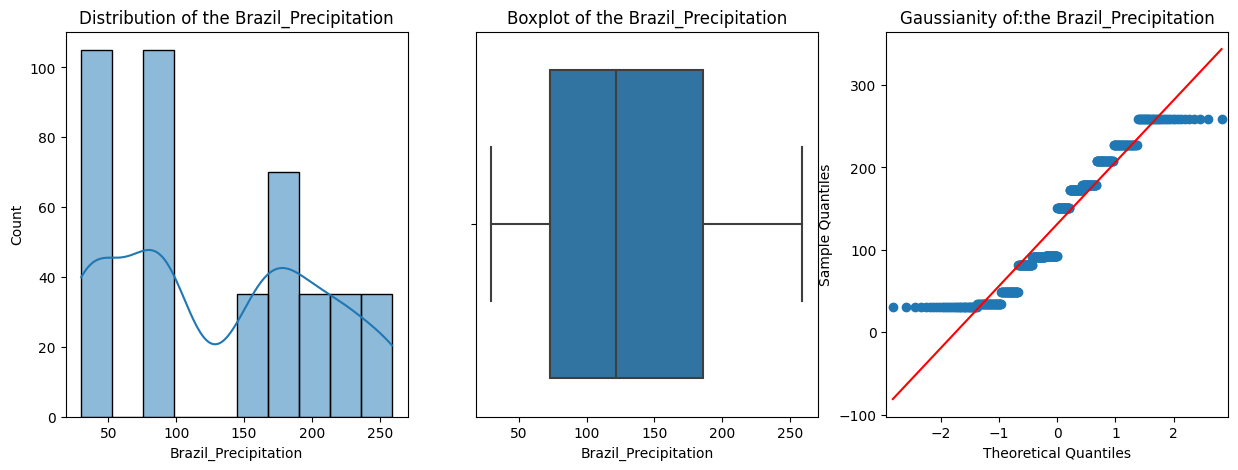

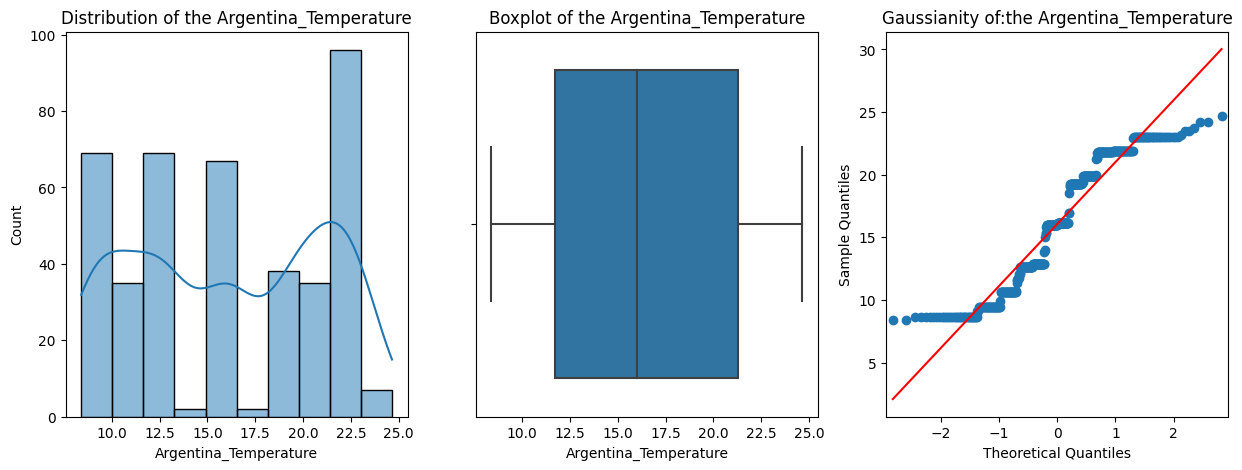

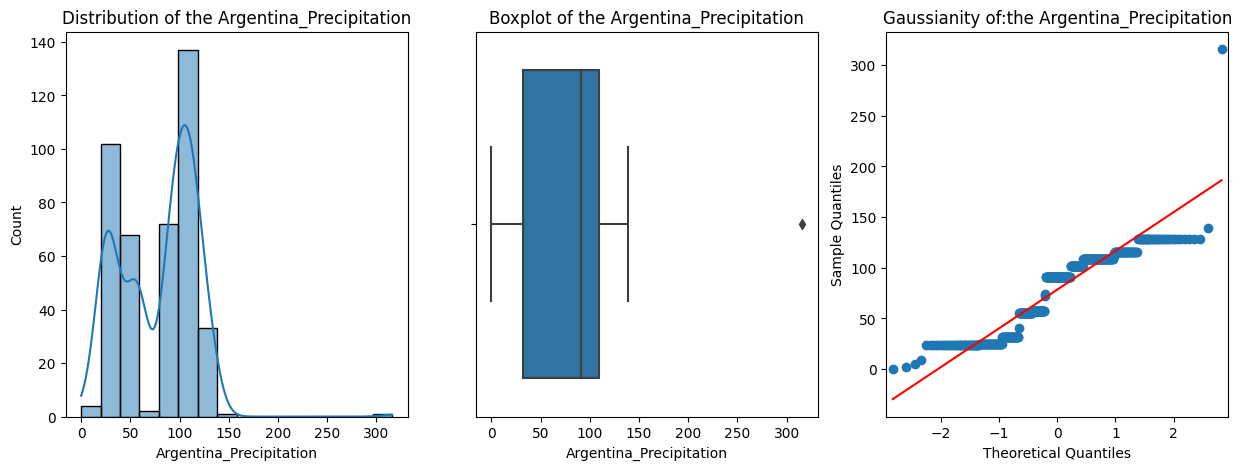

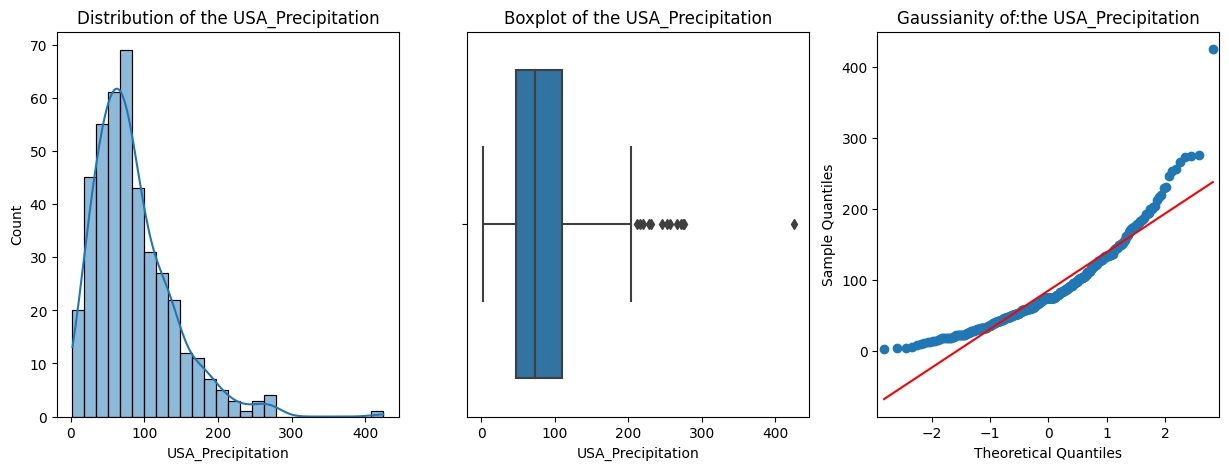

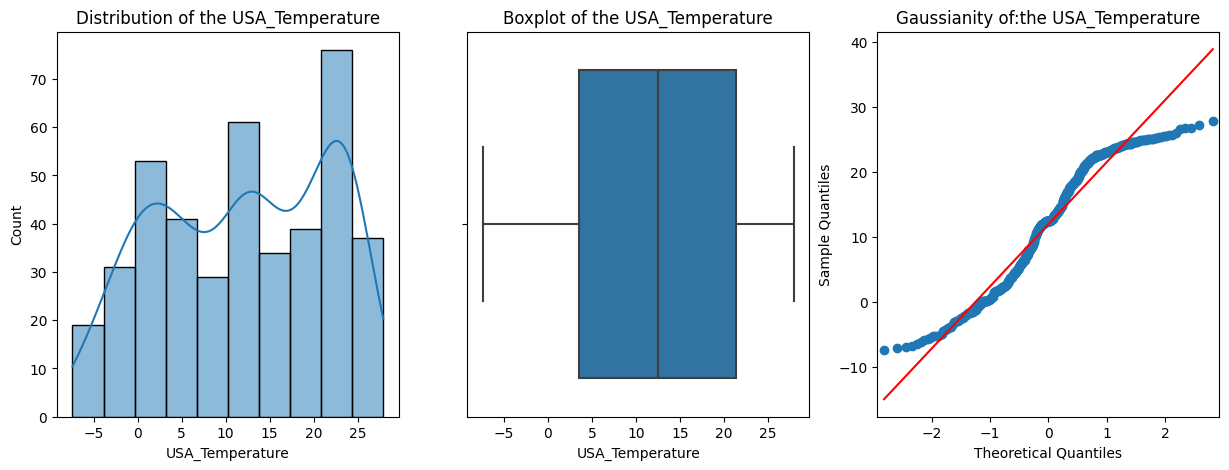

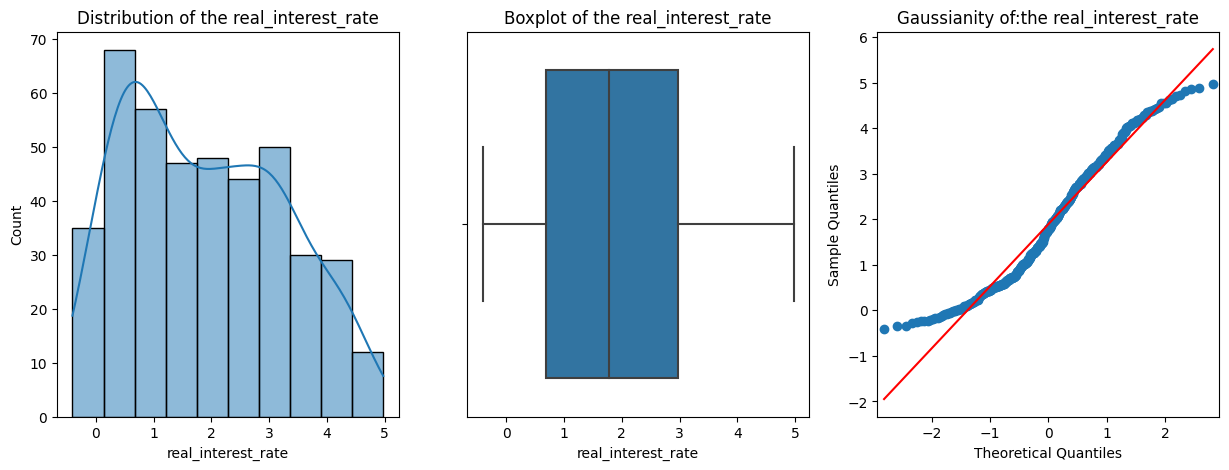

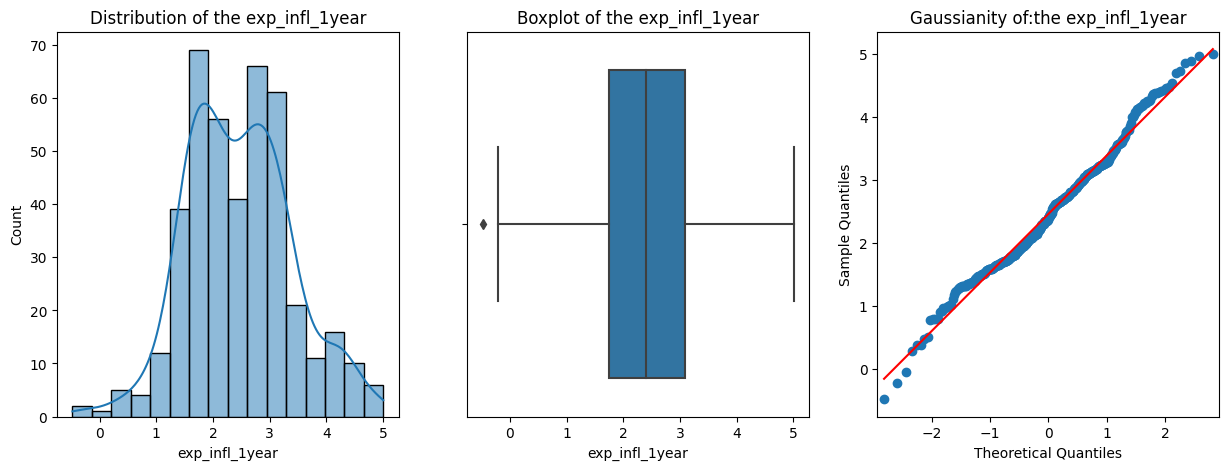

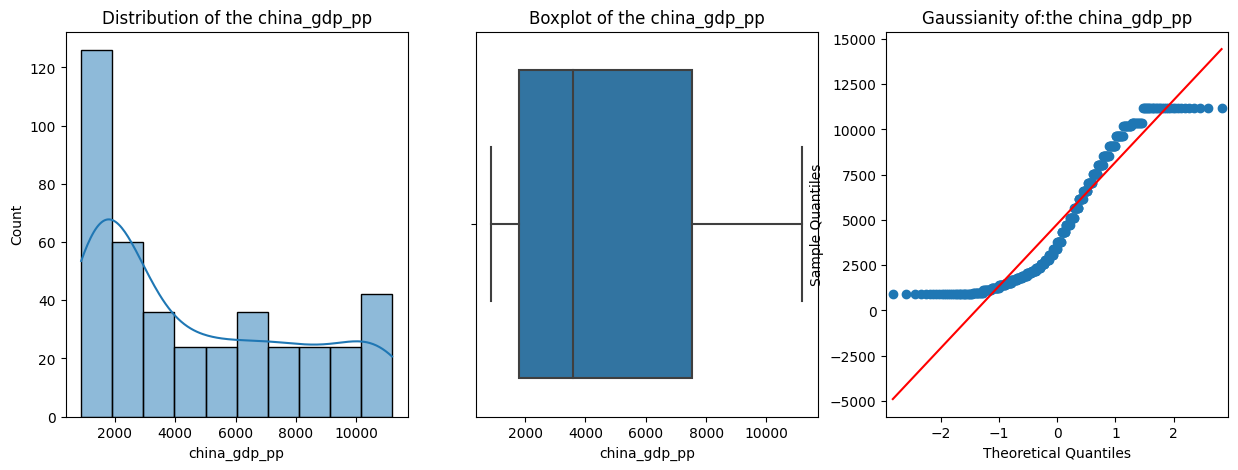

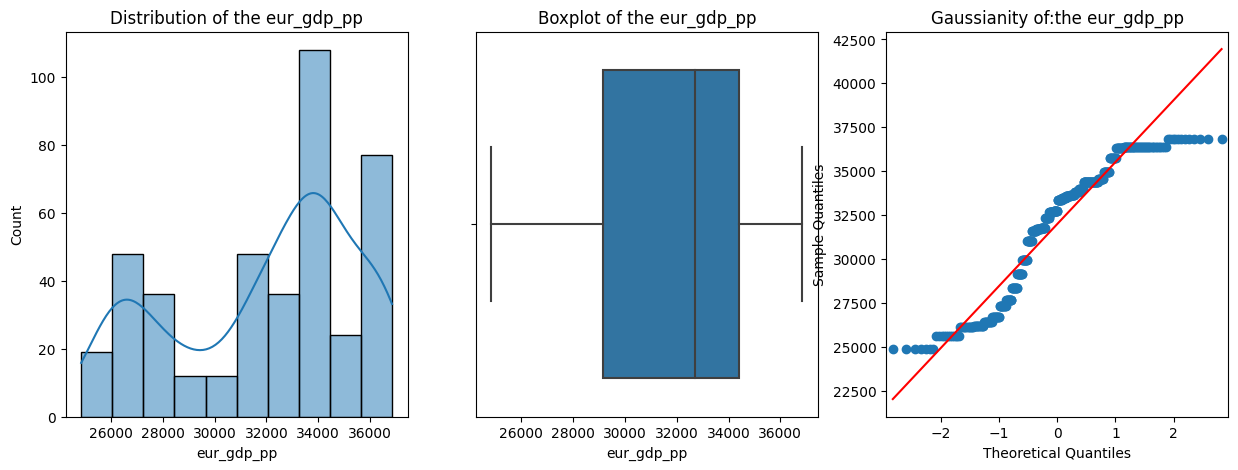

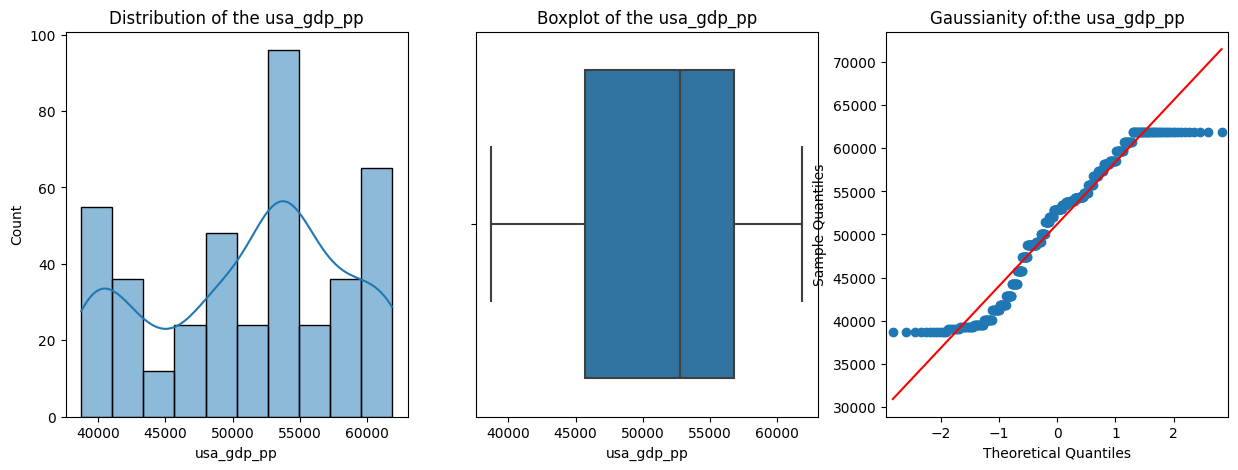

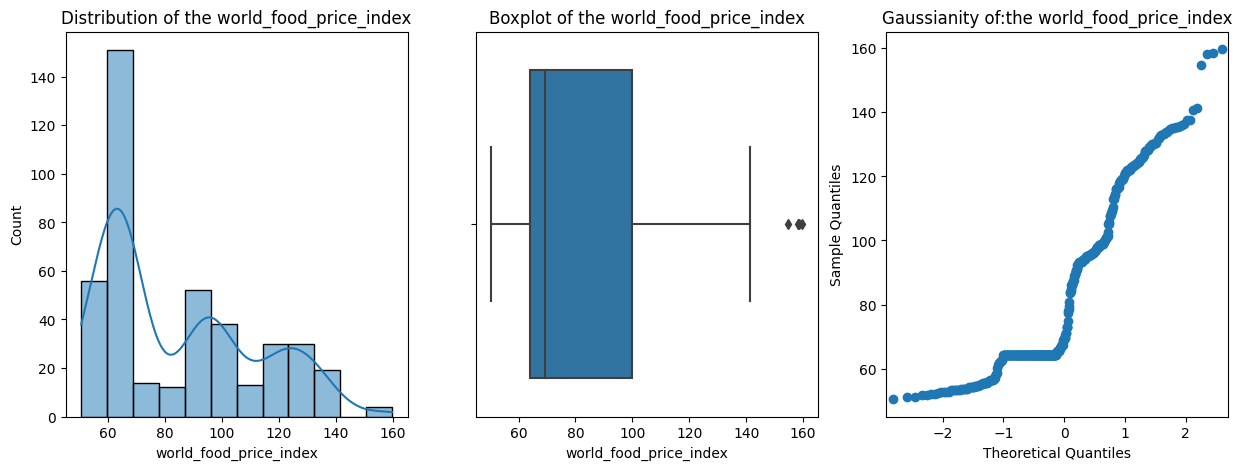

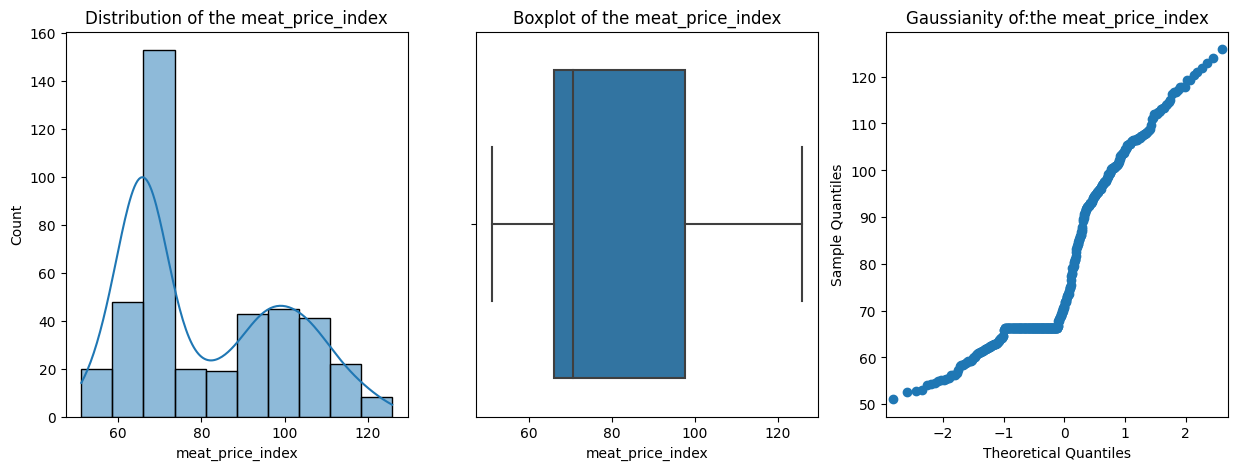

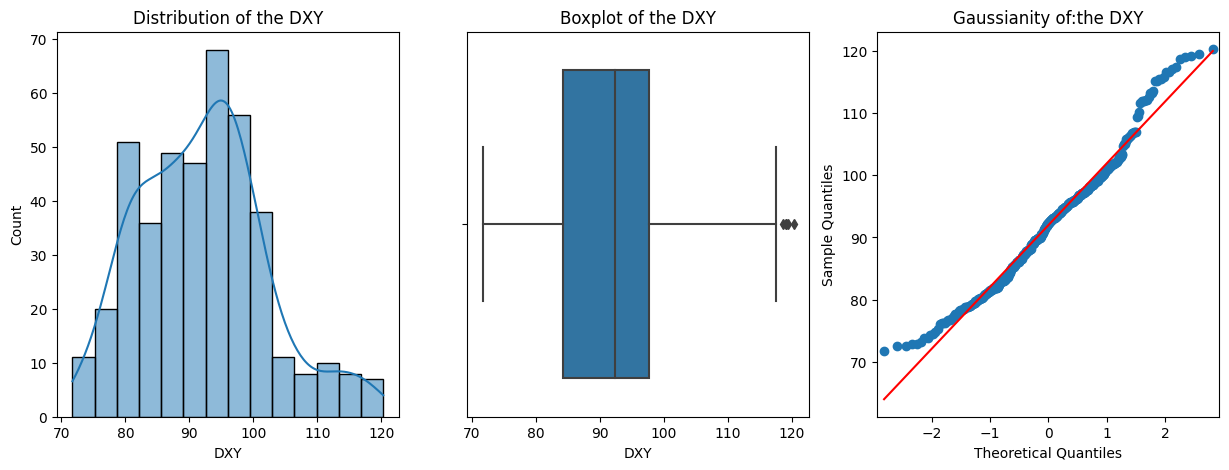

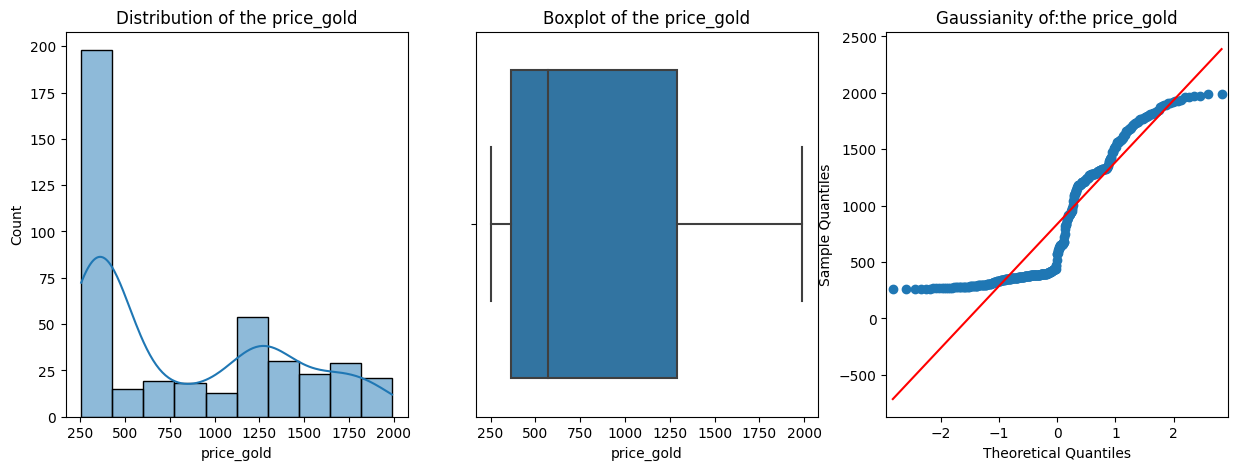

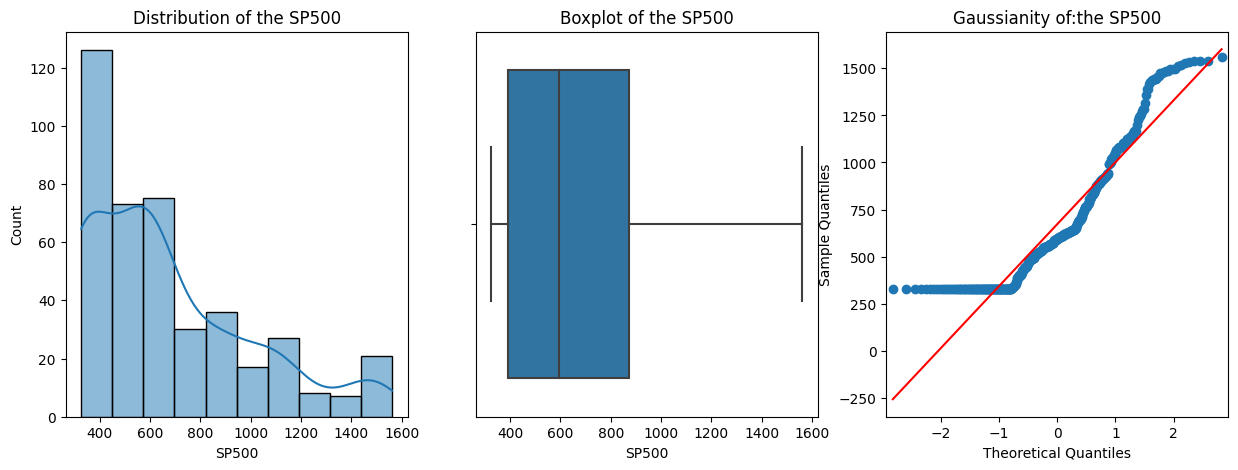

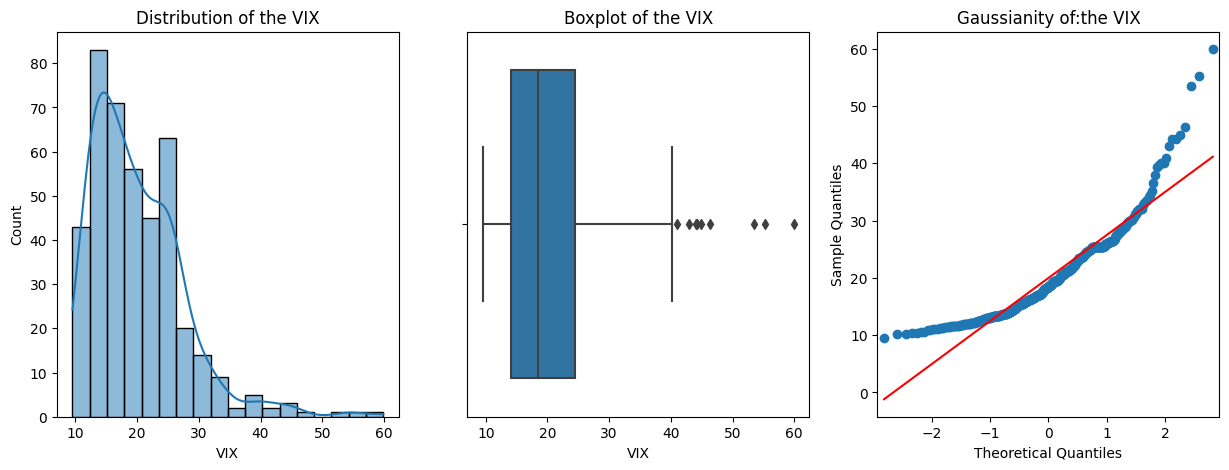

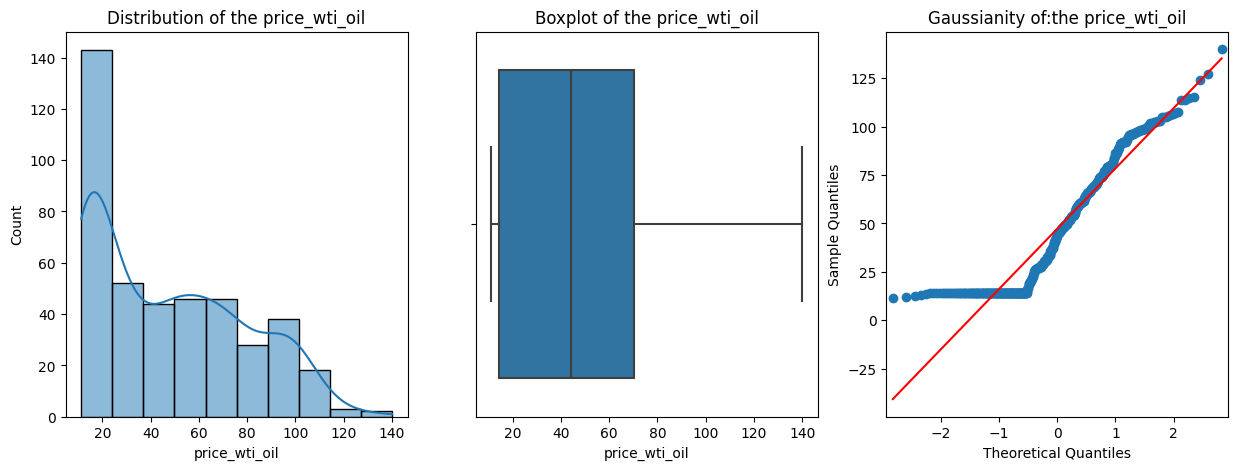

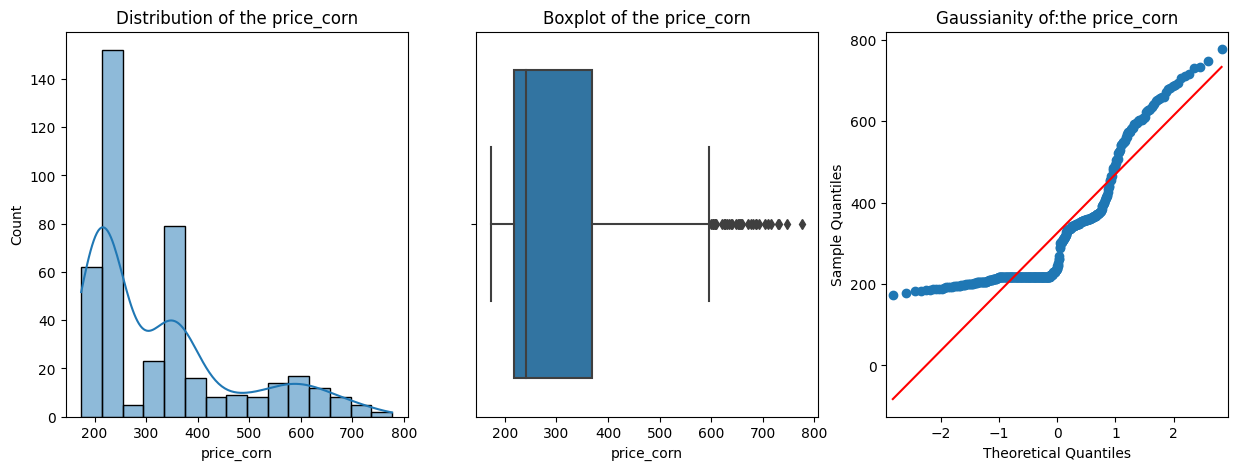

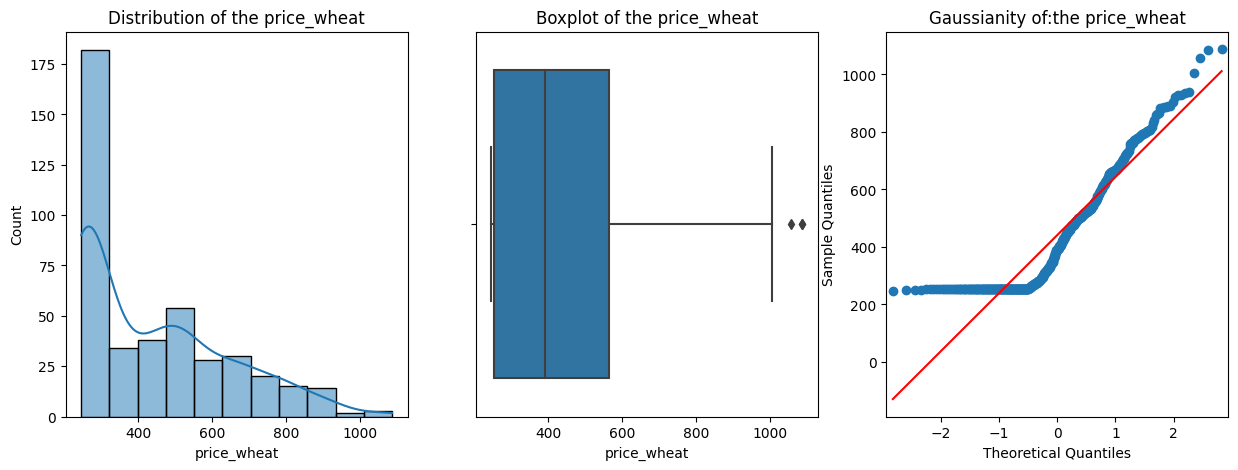

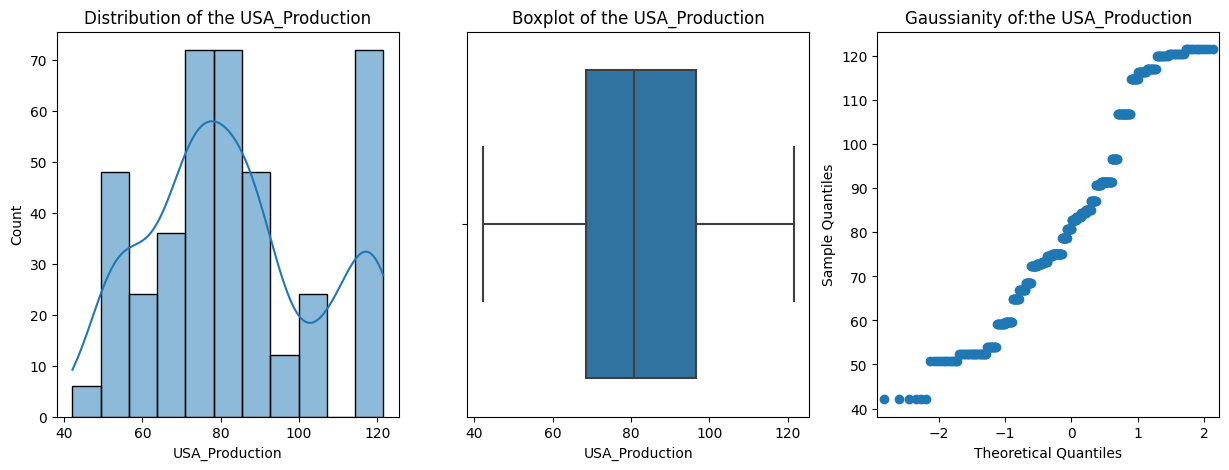

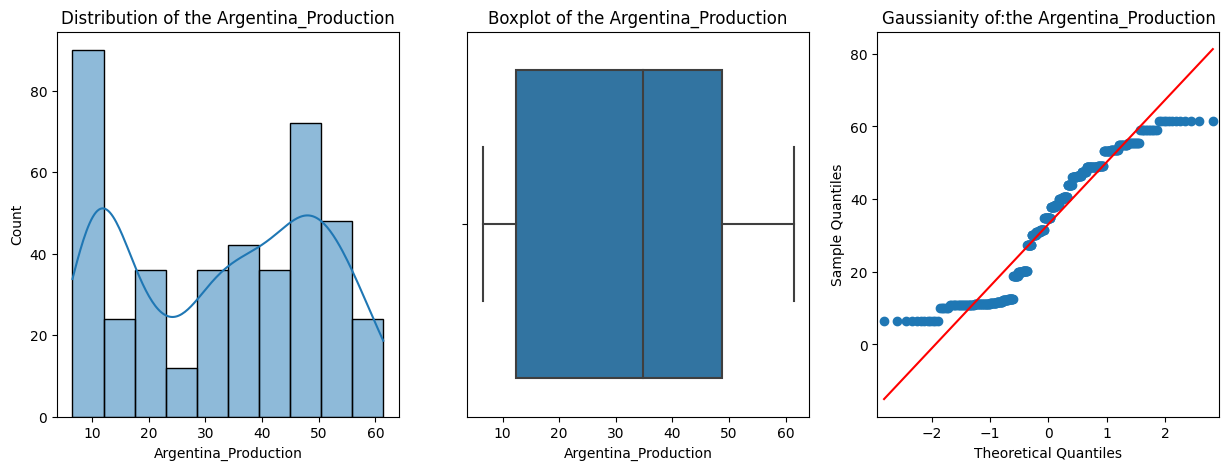

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

numeric_features=[x for x in df_copy_agricultural.columns if df_copy_agricultural[x].dtype!="object"]
#taking only the numeric columns from the dataframe.

for i in df_copy_agricultural[numeric_features].columns:
    fig, ax = plt.subplots(1,3,figsize=(15,5))
    ax[0].set_title(f"Distribution of the {i}")
    sns.histplot(data = df_copy_agricultural, x = f"{i}", kde=True, ax = ax[0])
    
    ax[1].set_title(f"Boxplot of the {i}")
    sns.boxplot(data = df_copy_agricultural, x = f"{i}", ax=ax[1])
    
    ax[2].set_title(f"Gaussianity of:the {i}")
    qqplot(df_copy_agricultural[f"{i}"],line='s',ax=ax[2]);


## Scale Classification
- ##Price_soybean = Robust Scaler
- Brazil_temperature = MinMax Scaler
- Brazil_Precipitation = MinMax Scaler
- Argentina_temperature = MinMax Scaler
- Argentina_Precipitation = MinMax Scaler
- USA_Precipitation = Robust Scaler
- USA_temperature = MinMax Scaler
- real_interest_rate = MinMax Scaler
- exp_infl_1year = Standard Scaler
- china_gdp_pp = MinMax Scaler
- eur_gdp_pp = MinMax Scaler
- usa_gdp_pp = MinMax Scaler
- world_food_price_index = Robust Scaler
- meat_price_index = MinMax Scaler
- DXY = Robust Scaler
- price_gold = MinMax Scaler
- SP500 = MinMax Scaler
- VIX = Robust Scaler
- price_wti_oil = MinMax Scaler
- price_corn = Robust Scaler
- price_wheat = MinMax Scaler
- USA_Production = MinMax Scaler
- Argentina_Production = MinMax Scaler
- Brazil_Production = MinMax Scaler

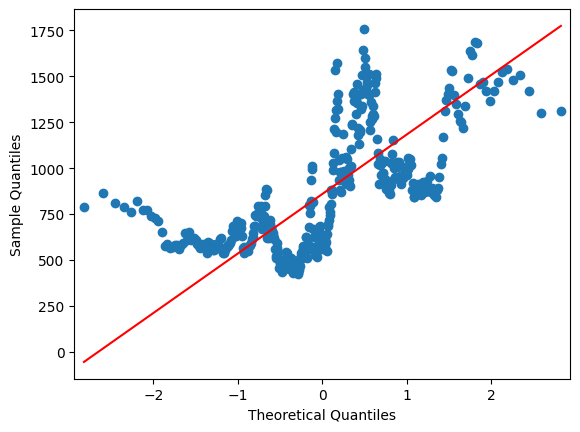

In [53]:
qqplot(df_copy_agricultural[["price_soybean"]],line='s');

<Axes: >

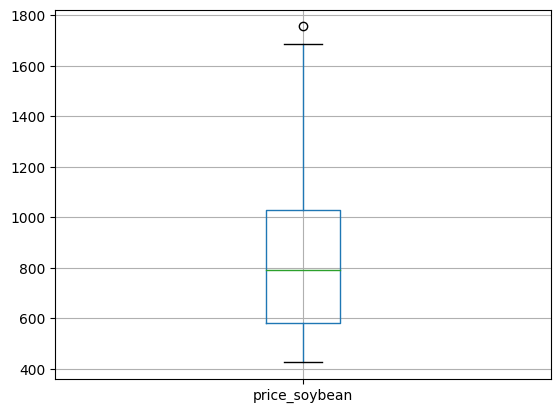

In [55]:
df_copy_agricultural[['price_soybean']].boxplot()

In [92]:
df_copy_agricultural[['meat_price_index', 'world_food_price_index', 'price_wheat', 'price_corn', 'price_wti_oil',
                     'price_gold', 'VIX', 'SP500', 'DXY', 'exp_infl_1year', 'real_interest_rate']].describe()

,meat_price_index,world_food_price_index,price_wheat,price_corn,price_wti_oil,price_gold,VIX,SP500,DXY,exp_infl_1year,real_interest_rate
count,419.000000,419.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,80.736993,84.436277,440.915476,325.235714,47.197976,835.558607,19.979071,672.419048,91.983757,2.458558,1.891121
std,18.827180,26.706328,202.044734,144.565548,31.187824,550.602320,7.501371,329.323746,9.932958,0.927958,1.362698
min,51.100000,50.500000,246.000000,174.000000,11.220000,255.500000,9.510000,326.200000,71.741000,-0.480680,-0.407130
25%,66.200000,64.200000,252.500000,217.250000,14.210000,362.825000,14.015000,390.375000,84.247500,1.754173,0.695505
50%,70.700000,69.400000,390.375000,240.500000,44.200000,568.500000,18.479995,594.700000,92.328500,2.401740,1.786485
75%,97.600000,99.950000,564.625000,369.687500,70.347500,1292.125000,24.537492,873.700000,97.695000,3.087290,2.971640
max,125.900000,159.700000,1087.500000,776.750000,140.000000,1989.620000,59.890000,1561.700000,120.280000,5.004300,4.973720


In [93]:
df_copy_agricultural[['usa_gdp_pp', 'eur_gdp_pp', 'china_gdp_pp', 'Argentina_Production', 'Brazil_Production', 
                      'USA_Production', 'Argentina_Precipitation', 'Brazil_Precipitation', 'USA_Precipitation', 
                      'Argentina_Temperature', 'Brazil_Temperature', 'USA_Temperature']].describe()

,usa_gdp_pp,eur_gdp_pp,china_gdp_pp,Argentina_Production,Brazil_Production,USA_Production,Argentina_Precipitation,Brazil_Precipitation,USA_Precipitation,Argentina_Temperature,Brazil_Temperature,USA_Temperature
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,51198.419905,31982.195786,4766.619143,33.082872,65.052571,83.114714,78.410000,131.083333,84.448348,16.050952,24.020833,11.962762
std,7189.265924,3532.601430,3426.846395,17.073359,39.445462,21.491352,38.297886,75.255525,54.211038,4.953679,1.744617,9.565229
min,38739.800000,24854.100000,883.760000,6.500000,15.750000,42.153000,0.000000,30.000000,2.286000,8.400000,21.050000,-7.390000
25%,45715.690000,29162.540000,1787.760000,12.448200,31.300000,68.444000,32.000000,73.000000,47.180500,11.725000,22.787500,3.485000
50%,52789.730000,32715.790000,3595.735000,34.785121,57.000000,80.749000,91.200000,121.500000,73.660000,16.000000,25.025000,12.530000
75%,56762.730000,34401.460000,7532.770000,48.796661,95.700000,96.667000,109.000000,186.000000,109.982000,21.275000,25.325000,21.390000
max,61855.520000,36847.880000,11188.300000,61.398276,156.000000,121.528000,315.900000,259.000000,424.688000,24.650000,25.700000,27.890000


## Scaling and feature selection

Robust Scaler technique for prices and climate features. MinMax Scaler technique for production??

In [77]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()

df_copy_agricultural['USA_Precipitation'] = rb_scaler.fit_transform(df_copy_agricultural[['USA_Precipitation']])
df_copy_agricultural['world_food_price_index'] = rb_scaler.fit_transform(df_copy_agricultural[['world_food_price_index']])
df_copy_agricultural['VIX'] = rb_scaler.fit_transform(df_copy_agricultural[['VIX']])
df_copy_agricultural['price_corn'] = rb_scaler.fit_transform(df_copy_agricultural[['price_gold']])
df_copy_agricultural['DXY'] = rb_scaler.fit_transform(df_copy_agricultural[['DXY']])


#df_copy_agricultural['exp_infl_1year'] = rb_scaler.fit_transform(df_copy_agricultural[['exp_infl_1year']])

#df_copy_agricultural['real_interest_rate'] = rb_scaler.fit_transform(df_copy_agricultural[['real_interest_rate']])
#df_copy_agricultural['usa_gdp_pp'] = rb_scaler.fit_transform(df_copy_agricultural[['usa_gdp_pp']])
#df_copy_agricultural['eur_gdp_pp'] = rb_scaler.fit_transform(df_copy_agricultural[['eur_gdp_pp']])
#df_copy_agricultural['china_gdp_pp'] = rb_scaler.fit_transform(df_copy_agricultural[['china_gdp_pp']])
#df_copy_agricultural['Argentina_Precipitation'] = rb_scaler.fit_transform(df_copy_agricultural[['Argentina_Precipitation']])
#df_copy_agricultural['Brazil_Precipitation'] = rb_scaler.fit_transform(df_copy_agricultural[['Brazil_Precipitation']])

#df_copy_agricultural['Argentina_Temperature'] = rb_scaler.fit_transform(df_copy_agricultural[['Argentina_Temperature']])
#df_copy_agricultural['Brazil_Temperature'] = rb_scaler.fit_transform(df_copy_agricultural[['Brazil_Temperature']])
#df_copy_agricultural['USA_Temperature'] = rb_scaler.fit_transform(df_copy_agricultural[['USA_Temperature']])

df_copy_agricultural.head()

,price_soybean,Brazil_Temperature,Brazil_Precipitation,Argentina_Temperature,Argentina_Precipitation,USA_Precipitation,USA_Temperature,real_interest_rate,exp_infl_1year,china_gdp_pp,...,DXY,price_gold,SP500,VIX,price_wti_oil,price_corn,price_wheat,USA_Production,Brazil_Production,Argentina_Production
0,787.50,0.000000,0.000000,0.012308,0.075340,-0.351871,0.929138,0.899947,0.866145,0.0,...,0.386801,0.104145,0.0,0.653838,0.023218,-0.142473,0.007724,0.0,0.342857,0.061933
1,867.50,0.462366,0.017467,0.224615,0.101298,-0.234580,0.937075,0.919905,0.883046,0.0,...,0.398699,0.100224,0.0,0.653838,0.023218,-0.149790,0.007724,0.0,0.342857,0.061933
2,813.00,0.849462,0.270742,0.206154,0.181387,0.068756,0.785714,0.950591,0.892417,0.0,...,0.398699,0.080098,0.0,0.653838,0.023218,-0.187345,0.007724,0.0,0.342857,0.061933
3,789.25,1.000000,0.528384,0.424615,0.345046,-0.343782,0.472506,0.904898,0.884732,0.0,...,0.106451,0.090651,0.0,0.653838,0.023218,-0.167653,0.007724,0.0,0.342857,0.061933
4,763.75,0.892473,0.624454,0.673846,0.323204,1.213347,0.376417,0.885706,0.862561,0.0,...,-0.133742,0.089094,0.0,0.653838,0.023218,-0.170558,0.007724,0.0,0.342857,0.061933


In [78]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
df_copy_agricultural['Brazil_Temperature']= minmaxscaler.fit_transform(df_copy_agricultural[['Brazil_Temperature']])
df_copy_agricultural['Brazil_Precipitation']= minmaxscaler.fit_transform(df_copy_agricultural[['Brazil_Precipitation']])
df_copy_agricultural['USA_Temperature']= minmaxscaler.fit_transform(df_copy_agricultural[['USA_Temperature']])
df_copy_agricultural['Argentina_Precipitation']= minmaxscaler.fit_transform(df_copy_agricultural[['Argentina_Precipitation']])
df_copy_agricultural['Argentina_Temperature']= minmaxscaler.fit_transform(df_copy_agricultural[['Argentina_Temperature']])
df_copy_agricultural['real_interest_rate']= minmaxscaler.fit_transform(df_copy_agricultural[['real_interest_rate']])
df_copy_agricultural['china_gdp_pp']= minmaxscaler.fit_transform(df_copy_agricultural[['china_gdp_pp']])
df_copy_agricultural['usa_gdp_pp']= minmaxscaler.fit_transform(df_copy_agricultural[['usa_gdp_pp']])
df_copy_agricultural['eur_gdp_pp']= minmaxscaler.fit_transform(df_copy_agricultural[['eur_gdp_pp']])
df_copy_agricultural['meat_price_index']= minmaxscaler.fit_transform(df_copy_agricultural[['meat_price_index']])
df_copy_agricultural['price_gold']= minmaxscaler.fit_transform(df_copy_agricultural[['price_gold']])
df_copy_agricultural['SP500']= minmaxscaler.fit_transform(df_copy_agricultural[['SP500']])
df_copy_agricultural['price_wti_oil']= minmaxscaler.fit_transform(df_copy_agricultural[['price_wti_oil']])
df_copy_agricultural['price_wheat']= minmaxscaler.fit_transform(df_copy_agricultural[['price_wheat']])
df_copy_agricultural['USA_Production']= minmaxscaler.fit_transform(df_copy_agricultural[['USA_Production']])
df_copy_agricultural['Argentina_Production']= minmaxscaler.fit_transform(df_copy_agricultural[['Argentina_Production']])
df_copy_agricultural['Brazil_Production']= minmaxscaler.fit_transform(df_copy_agricultural[['Brazil_Production']])

df_copy_agricultural.head()

,price_soybean,Brazil_Temperature,Brazil_Precipitation,Argentina_Temperature,Argentina_Precipitation,USA_Precipitation,USA_Temperature,real_interest_rate,exp_infl_1year,china_gdp_pp,...,DXY,price_gold,SP500,VIX,price_wti_oil,price_corn,price_wheat,USA_Production,Brazil_Production,Argentina_Production
0,787.50,0.000000,0.000000,0.012308,0.075340,-0.351871,0.929138,0.899947,0.866145,0.0,...,0.386801,0.104145,0.0,0.653838,0.023218,-0.142473,0.007724,0.0,0.342857,0.061933
1,867.50,0.462366,0.017467,0.224615,0.101298,-0.234580,0.937075,0.919905,0.883046,0.0,...,0.398699,0.100224,0.0,0.653838,0.023218,-0.149790,0.007724,0.0,0.342857,0.061933
2,813.00,0.849462,0.270742,0.206154,0.181387,0.068756,0.785714,0.950591,0.892417,0.0,...,0.398699,0.080098,0.0,0.653838,0.023218,-0.187345,0.007724,0.0,0.342857,0.061933
3,789.25,1.000000,0.528384,0.424615,0.345046,-0.343782,0.472506,0.904898,0.884732,0.0,...,0.106451,0.090651,0.0,0.653838,0.023218,-0.167653,0.007724,0.0,0.342857,0.061933
4,763.75,0.892473,0.624454,0.673846,0.323204,1.213347,0.376417,0.885706,0.862561,0.0,...,-0.133742,0.089094,0.0,0.653838,0.023218,-0.170558,0.007724,0.0,0.342857,0.061933


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_copy_agricultural['exp_infl_1year']= minmaxscaler.fit_transform(df_copy_agricultural[['exp_infl_1year']])
df_copy_agricultural.head()

,price_soybean,Brazil_Temperature,Brazil_Precipitation,Argentina_Temperature,Argentina_Precipitation,USA_Precipitation,USA_Temperature,real_interest_rate,exp_infl_1year,china_gdp_pp,...,DXY,price_gold,SP500,VIX,price_wti_oil,price_corn,price_wheat,USA_Production,Brazil_Production,Argentina_Production
0,787.50,0.000000,0.000000,0.012308,0.075340,-0.351871,0.929138,0.899947,0.866145,0.0,...,0.386801,0.104145,0.0,0.653838,0.023218,-0.142473,0.007724,0.0,0.342857,0.061933
1,867.50,0.462366,0.017467,0.224615,0.101298,-0.234580,0.937075,0.919905,0.883046,0.0,...,0.398699,0.100224,0.0,0.653838,0.023218,-0.149790,0.007724,0.0,0.342857,0.061933
2,813.00,0.849462,0.270742,0.206154,0.181387,0.068756,0.785714,0.950591,0.892417,0.0,...,0.398699,0.080098,0.0,0.653838,0.023218,-0.187345,0.007724,0.0,0.342857,0.061933
3,789.25,1.000000,0.528384,0.424615,0.345046,-0.343782,0.472506,0.904898,0.884732,0.0,...,0.106451,0.090651,0.0,0.653838,0.023218,-0.167653,0.007724,0.0,0.342857,0.061933
4,763.75,0.892473,0.624454,0.673846,0.323204,1.213347,0.376417,0.885706,0.862561,0.0,...,-0.133742,0.089094,0.0,0.653838,0.023218,-0.170558,0.007724,0.0,0.342857,0.061933


## Correlation investigation

In [40]:
df_copy_agricultural.drop(columns=['date'], inplace=True)

In [41]:
df_copy_agricultural.drop(columns=['year month'], inplace=True)

<Axes: >

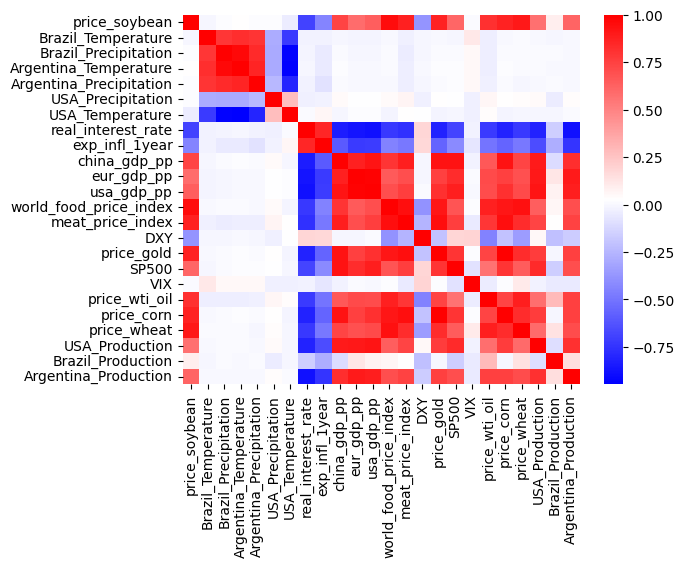

In [42]:
import seaborn as sns

corr = df_copy_agricultural.corr()

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= 'bwr')

### Visualizing the correlation between column pairs

In [43]:
corr_df = corr.stack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df

,feature_1,feature_2,correlation
471,price_corn,price_gold,1.000000
379,price_gold,price_corn,1.000000
274,usa_gdp_pp,eur_gdp_pp,0.988036
251,eur_gdp_pp,usa_gdp_pp,0.988036
51,Brazil_Precipitation,Argentina_Temperature,0.969199
...,...,...,...
271,usa_gdp_pp,real_interest_rate,-0.885296
54,Brazil_Precipitation,USA_Temperature,-0.931837
146,USA_Temperature,Brazil_Precipitation,-0.931837
147,USA_Temperature,Argentina_Temperature,-0.947009


In [104]:
correlated_features = len(corr_df[(corr_df['correlation'] >= 0.9) | (corr_df['correlation'] <= -0.9)])

correlated_features

44

In [118]:
corr_df[(corr_df['correlation'] <= 0.9)]

,feature_1,feature_2,correlation
263,eur_gdp_pp,Argentina_Production,0.896156
562,Argentina_Production,eur_gdp_pp,0.896156
321,meat_price_index,china_gdp_pp,0.885343
229,china_gdp_pp,meat_price_index,0.885343
287,usa_gdp_pp,Argentina_Production,0.885077
...,...,...,...
179,real_interest_rate,usa_gdp_pp,-0.885296
54,Brazil_Precipitation,USA_Temperature,-0.931837
146,USA_Temperature,Brazil_Precipitation,-0.931837
78,Argentina_Temperature,USA_Temperature,-0.947009


In [44]:
corr_df[(corr_df['feature_1'] == 'price_soybean')]

,feature_1,feature_2,correlation
12,price_soybean,world_food_price_index,0.948900
20,price_soybean,price_wheat,0.903268
13,price_soybean,meat_price_index,0.874514
19,price_soybean,price_corn,0.866301
15,price_soybean,price_gold,0.866301
18,price_soybean,price_wti_oil,0.811772
9,price_soybean,china_gdp_pp,0.738696
11,price_soybean,usa_gdp_pp,0.636864
23,price_soybean,Argentina_Production,0.616172
16,price_soybean,SP500,0.608922


## Compute the Principal Components

In [92]:
from sklearn.decomposition import PCA
X = df_copy_agricultural.drop(columns=['price_soybean'], axis=1)
y = df_copy_agricultural['price_soybean']


In [99]:
pca = PCA()
pca.fit(X)

PCA()

In [70]:
#df_copy_agricultural.isnull().values.any()

True

In [75]:
#for i in df_copy_agricultural[numeric_features].columns:
#    print(f'{i},{df_copy_agricultural[i].isnull().sum()}')

price_soybean,0
Brazil_Temperature,0
Brazil_Precipitation,0
Argentina_Temperature,0
Argentina_Precipitation,0
USA_Precipitation,0
USA_Temperature,0
real_interest_rate,0
exp_infl_1year,0
china_gdp_pp,0
eur_gdp_pp,0
usa_gdp_pp,0
world_food_price_index,1
meat_price_index,1
DXY,0
price_gold,0
SP500,0
VIX,0
price_wti_oil,0
price_corn,0
price_wheat,0
USA_Production,0
Argentina_Production,0


In [100]:
agricultural_features = X.columns
# Access our 23 PCs 
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=agricultural_features,
                 columns=[f'PC{i}' for i in range(1, 24)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Brazil_Temperature,-0.005908,-0.204978,0.001384,0.102020,-0.494825,-0.010080,-0.014038,-0.114568,0.807888,0.002056,...,-0.081114,-0.056515,-0.094636,-0.069092,-0.005618,-0.086459,-0.037457,0.013158,0.003335,-5.845975e-17
Brazil_Precipitation,-0.003359,-0.184509,-0.011763,0.064376,-0.477989,-0.004054,0.020223,0.038162,-0.314403,0.005424,...,0.548406,-0.061572,-0.094647,-0.172337,0.220880,-0.277242,0.012316,0.001737,0.019857,1.473716e-17
Argentina_Temperature,-0.002168,-0.172679,-0.009045,0.057223,-0.450175,0.007250,0.022221,0.018216,-0.226574,0.010669,...,-0.039451,0.016293,0.156318,0.147951,-0.492223,0.643426,-0.043324,-0.004220,-0.024928,-4.018109e-17
Argentina_Precipitation,-0.001063,-0.059103,-0.003516,0.023282,-0.162764,-0.008799,0.000299,0.010923,0.018162,0.008874,...,-0.017791,0.402553,0.710200,0.306494,0.389161,-0.058079,0.206370,0.003195,0.016569,2.208155e-16
USA_Precipitation,0.062179,0.920263,0.133026,0.103917,-0.346355,-0.013674,0.015652,0.009491,0.009397,0.008383,...,0.001316,-0.005631,-0.002882,0.003552,-0.003240,-0.002610,-0.000424,-0.001004,0.000427,2.130899e-17
USA_Temperature,0.001107,0.142832,0.017932,-0.049224,0.382766,-0.010417,-0.020958,-0.060086,0.412055,0.008518,...,0.547504,0.020213,0.257721,0.000469,-0.150974,0.265088,-0.029612,0.033125,0.005878,-8.228984e-17
real_interest_rate,-0.171668,0.018096,-0.044689,0.031434,0.004943,0.260752,0.080650,-0.068575,-0.033317,0.399254,...,-0.188412,-0.179695,0.433853,-0.488263,-0.177907,-0.167420,-0.039825,-0.001071,0.113497,-3.211673e-16
exp_infl_1year,-0.081363,0.010788,-0.022845,0.000917,0.012205,0.285389,0.075477,-0.148984,0.036843,0.384866,...,-0.069265,-0.170202,-0.272660,0.574433,0.189007,0.078902,0.252268,0.077063,-0.011390,3.400196e-16
china_gdp_pp,0.237568,-0.023109,0.116693,-0.126430,-0.022511,-0.015943,-0.192682,0.113440,0.002912,0.150480,...,0.099849,0.088049,-0.059297,-0.229213,0.081516,0.157504,0.200396,0.786910,-0.159481,2.976826e-17
eur_gdp_pp,0.187352,-0.022764,0.100048,-0.103054,-0.004683,-0.346534,-0.115716,-0.196429,-0.035772,0.241356,...,-0.121454,-0.046840,0.092423,0.057437,-0.293341,-0.294178,0.237324,-0.130893,-0.621370,-2.890147e-16


In [101]:
X_proj = pca.transform(X)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 24)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,-1.453511,-0.094135,0.239207,0.255408,1.154551,0.606829,0.159655,0.163125,-0.108313,-0.024316,...,0.025466,0.017812,0.008550,-0.011520,0.019008,0.000272,-0.018542,0.018290,0.046673,1.167672e-16
1,-1.461093,-0.120991,0.259901,0.323306,0.779582,0.611777,0.166875,0.105436,0.215720,-0.007313,...,-0.010554,-0.001650,0.020212,-0.007198,-0.076321,0.090444,-0.035467,0.026311,0.045709,1.146914e-16
2,-1.473448,0.011687,0.288574,0.422704,0.299466,0.605794,0.180015,0.050750,0.390208,0.011348,...,0.015789,-0.015067,-0.017769,-0.066059,0.034870,-0.073439,-0.020021,0.033951,0.055267,1.180934e-16
3,-1.419307,-0.523545,0.012697,0.591521,0.017670,0.562027,0.095380,0.098992,0.252850,0.035319,...,-0.022386,0.032922,-0.005256,-0.017668,0.104310,-0.097248,0.007691,0.020957,0.049969,1.632900e-16
4,-1.267920,0.871781,0.039145,0.890690,-0.645261,0.499161,0.056202,0.154940,0.051916,0.071197,...,-0.005655,0.024763,-0.015023,0.008286,0.004707,0.023495,-0.005858,0.011693,0.041647,2.248326e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1.809686,-0.903858,0.989950,-0.609647,-0.404319,0.409572,0.856036,0.354604,0.008328,0.385960,...,0.061637,0.073666,-0.053433,-0.033540,-0.160799,-0.085518,0.014563,0.038561,-0.020203,-2.253694e-16
416,1.856156,0.065903,0.880957,-0.607412,-0.566585,0.356499,0.784709,0.424514,0.088805,0.443269,...,0.042496,0.073089,0.035846,-0.143828,-0.163404,-0.126142,-0.015254,0.013824,-0.006594,-2.613841e-16
417,1.830598,-0.919322,0.506519,-0.989788,0.274595,0.399145,0.752438,0.396321,0.200950,0.417118,...,-0.021278,0.166190,0.018861,0.019910,-0.159432,-0.071429,0.017558,0.015667,-0.027481,-2.556272e-16
418,1.734267,-0.483493,0.734595,-0.942403,0.692574,0.363744,0.720456,0.490968,-0.118466,0.414076,...,0.119497,0.199365,0.083496,0.029172,-0.081276,-0.137536,0.078930,0.008590,-0.023794,-2.172083e-16


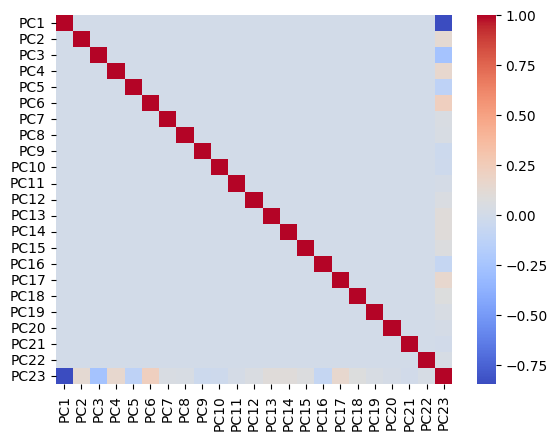

In [103]:
sns.heatmap(X_proj.corr(), cmap='coolwarm');

In [104]:
# Compute PCs
eig_vals, eig_vecs = np.linalg.eig(np.dot(X.T,X))

In [105]:
W = pd.DataFrame(eig_vecs, 
                 index=agricultural_features,
                 columns=[f'PC{i}' for i in range(1, 24)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Brazil_Temperature,-0.283676,-0.305338,0.111016,0.136854,-0.106033,-0.344674,0.040026,0.073175,-0.163752,0.761072,...,0.056434,-0.037224,-0.100287,-0.012697,-0.008049,-0.013436,0.010125,-0.060999,-0.067031,-0.005927
Brazil_Precipitation,-0.197698,-0.222906,0.116989,0.112655,-0.067608,-0.398256,-0.018441,-0.029877,0.055203,-0.346021,...,-0.273800,0.296881,-0.330877,0.010624,-0.017386,-0.001744,0.085771,-0.267727,-0.190690,0.270845
Argentina_Temperature,-0.209849,-0.227400,0.103358,0.112691,-0.060429,-0.361592,0.003872,-0.022341,0.044972,-0.257389,...,0.027361,-0.095993,0.213920,0.053553,0.044385,0.005203,-0.331754,0.407415,0.165091,-0.532488
Argentina_Precipitation,-0.109024,-0.108490,0.025739,0.054298,-0.024705,-0.107940,0.004309,0.010288,-0.023725,-0.010790,...,-0.059827,0.058756,0.798022,0.038539,-0.003172,-0.002406,0.166975,-0.063269,0.272542,0.449259
USA_Precipitation,-0.082328,0.132437,-0.936303,0.010617,-0.106306,-0.293255,-0.027040,-0.021878,-0.010702,0.008055,...,-0.000252,-0.002044,-0.006490,0.000419,-0.000311,0.001006,-0.000138,-0.003967,0.003500,-0.002473
USA_Temperature,-0.225263,-0.129213,-0.184849,0.046529,0.048964,0.558838,0.151747,0.134024,-0.130176,0.234684,...,-0.298399,0.209210,0.052119,0.069749,0.017456,-0.032131,-0.223725,0.022153,-0.014822,-0.107408
real_interest_rate,-0.140150,-0.314336,-0.093691,0.158148,-0.033682,0.168878,0.384843,0.028761,0.007873,-0.252716,...,0.161550,-0.269403,0.212245,0.041278,-0.103117,0.001327,-0.048925,-0.331445,-0.514172,-0.096502
exp_infl_1year,-0.207725,-0.258600,-0.080410,0.128296,-0.002976,0.171264,0.413780,0.042434,0.061607,-0.158422,...,0.180527,0.010879,-0.344975,0.046616,0.028109,-0.076092,0.184908,0.151714,0.579857,0.170741
china_gdp_pp,-0.217995,0.104141,0.020837,-0.119612,0.126711,-0.026283,-0.027414,0.195868,-0.124022,-0.091238,...,-0.167124,0.053627,0.035466,0.008953,0.167617,-0.786227,0.138390,0.249668,-0.218741,0.026482
eur_gdp_pp,-0.300004,-0.025319,-0.013486,-0.050310,0.102250,0.101558,-0.300004,0.124386,0.176040,-0.054067,...,0.184187,-0.042722,0.025717,-0.033014,0.626511,0.131646,0.282810,-0.297006,0.052467,-0.243479


### PCs are ranked by order of importance (variance)

In [106]:
# Let's compute it
X_proj.std()**2 / ((X.std()**2).sum())

PC1     3.810492e-01
PC2     1.958111e-01
PC3     1.517919e-01
PC4     1.090334e-01
PC5     7.596253e-02
PC6     3.020011e-02
PC7     2.011195e-02
PC8     1.014724e-02
PC9     9.056062e-03
PC10    4.582850e-03
PC11    2.747161e-03
PC12    2.514159e-03
PC13    1.404260e-03
PC14    1.256121e-03
PC15    1.025584e-03
PC16    8.515402e-04
PC17    6.919812e-04
PC18    6.269211e-04
PC19    4.876394e-04
PC20    3.571512e-04
PC21    2.193066e-04
PC22    7.176287e-05
PC23    4.645979e-33
dtype: float64

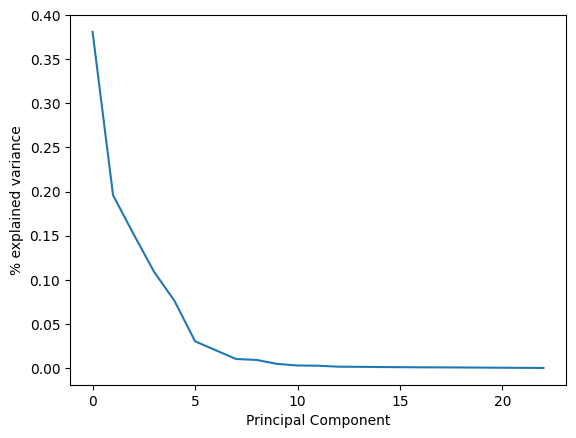

In [107]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

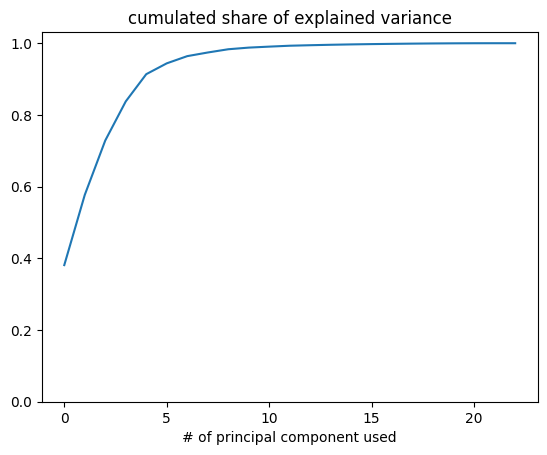

In [108]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [135]:
# Fit a PCA with only 3 components
pca5 = PCA(n_components=5).fit(X)

# Project your data into 3 dimensions
#X_proj10 = pd.DataFrame(pca3.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
#X_proj3 = pd.DataFrame(pca3.fit_transform(X), columns=['PC1', 'PC2', 'PC3'])
X_proj = pd.DataFrame(pca5.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# We have "compressed" our dataset in 3D
X_proj

,PC1,PC2,PC3,PC4,PC5
0,-1.453511,-0.094135,0.239207,0.255408,1.154551
1,-1.461093,-0.120991,0.259901,0.323306,0.779582
2,-1.473448,0.011687,0.288574,0.422704,0.299466
3,-1.419307,-0.523545,0.012697,0.591521,0.017670
4,-1.267920,0.871781,0.039145,0.890690,-0.645261
...,...,...,...,...,...
415,1.809686,-0.903858,0.989950,-0.609647,-0.404319
416,1.856156,0.065903,0.880957,-0.607412,-0.566585
417,1.830598,-0.919322,0.506519,-0.989788,0.274595
418,1.734267,-0.483493,0.734595,-0.942403,0.692574


In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

print("accuracy 5 PCs")
print(cross_val_score(LinearRegression(), X_proj, y, cv=5).mean())

print("\naccuracy all 24 initial features")
print(cross_val_score(LinearRegression(), X, y, cv=5).mean())

accuracy 5 PCs
0.08604351752578185

accuracy all 24 initial features
-0.005117525275246293


In [141]:
X_reconstructed = pca3.inverse_transform(X_proj)
X_reconstructed.shape

(420, 23)

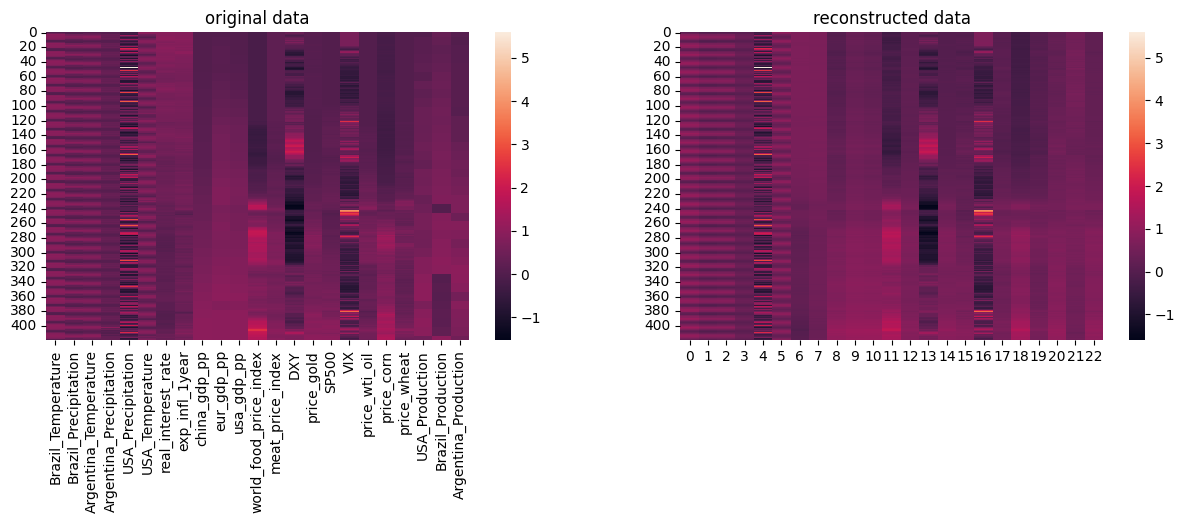

In [138]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.heatmap(X)
plt.title("original data")
plt.subplot(1,2,2)
plt.title("reconstructed data")
sns.heatmap(X_reconstructed);

## Base Modelling

In [45]:
X = df_copy_agricultural.drop(columns=['price_soybean'])
y = df_copy_agricultural['price_soybean']

In [113]:
y

0       787.50
1       867.50
2       813.00
3       789.25
4       763.75
        ...   
415    1479.00
416    1505.50
417    1419.25
418    1299.75
419    1310.00
Name: price_soybean, Length: 420, dtype: float64

In [115]:
df_copy_agricultural['price_soybean'].describe()

count     420.000000
mean      859.872024
std       324.179595
min       425.000000
25%       582.125000
50%       791.250000
75%      1030.250000
max      1756.500000
Name: price_soybean, dtype: float64

### Feature Importance with Linear Regression 

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

-0.8291973497871687

### Performing a feature permutation and ranking by order of importance

In [142]:
import numpy as np
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False, inplace=True) # Order by importance
importance_df

,feature,feature importance
10,usa_gdp_pp,1.898777
9,eur_gdp_pp,1.593412
11,world_food_price_index,1.233865
19,price_wheat,0.195293
15,SP500,0.169595
12,meat_price_index,0.10994
8,china_gdp_pp,0.070832
1,Brazil_Precipitation,0.057344
22,Argentina_Production,0.030646
2,Argentina_Temperature,0.027474


### Feature Importance with Logistic Regression 

In [145]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y)
base_model_score = scores.mean()

base_model_score


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/caromezach/.pyenv/versions/3.10.6/envs/Agricultural_Market_Predictions/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/caromezach/.pyenv/versions/3.10.6/envs/Agricultural_Market_Predictions/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1204, in fit
    check_classification_targets(y)
  File "/home/caromezach/.pyenv/versions/3.10.6/envs/Agricultural_Market_Predictions/lib/python3.10/site-packages/sklearn/utils/multiclass.py", line 218, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


In [179]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#ss = StandardScaler()
#X_train_scaled = ss.fit_transform(X_train)
#X_test_scaled = ss.transform(X_test)

#lab = preprocessing.LabelEncoder()
#y_transformed = lab.fit_transform(y_train)

In [180]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

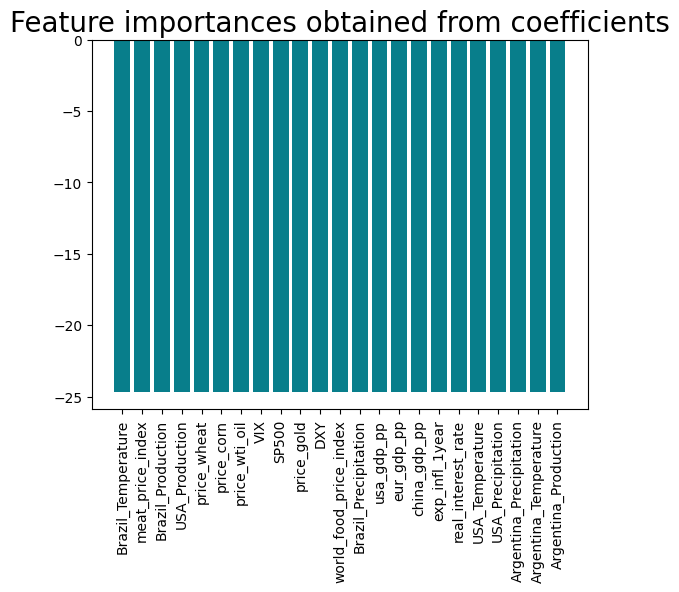

In [181]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [168]:
y

0       787.50
1       867.50
2       813.00
3       789.25
4       763.75
        ...   
415    1479.00
416    1505.50
417    1419.25
418    1299.75
419    1310.00
Name: price_soybean, Length: 420, dtype: float64

In [169]:
from xgboost import XGBRegressor

X = df_copy_agricultural.drop(columns=['price_soybean'], axis=1)
y = df_copy_agricultural['price_soybean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

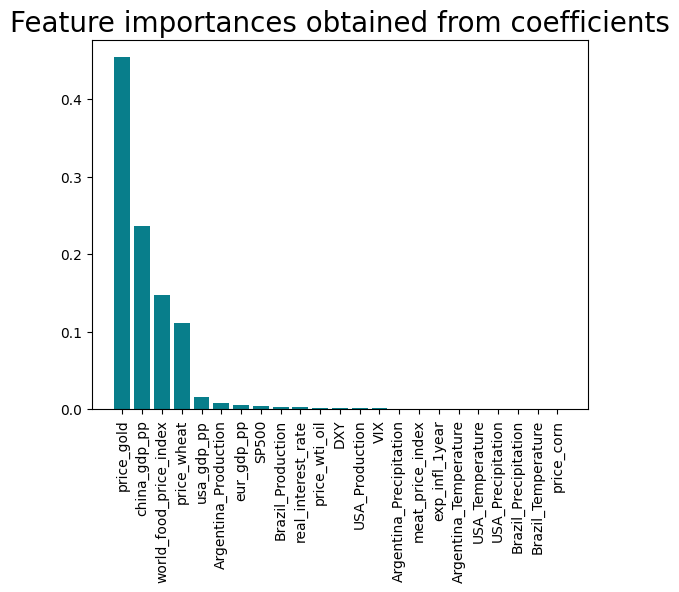

In [170]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## XGBoost Model

In [191]:
df_copy_agricultural.to_csv("Agricultural_data/consolidado_escalado.csv", index=False)

In [209]:
df_final_agricultural1 = pd.read_csv('Agricultural_data/consolidado_final.csv')
df_final_agricultural1

,date,year month,price_soybean,Brazil-Tmin,Brazil-Tmax,Brazil-T mean,Brazil-Precipitation,ARGENTINA-Tmin,ARGENTINA-Tmax,ARGENTINA T Mean,...,price_gold,SP500,VIX,price_wti_oil,price_corn,price_wheat,SOYBEANS - USA PRODUCTION [mTons],SOYBEANS - Brazil PRODUCTION [mTons],SOYBEANS - Argentina PRODUCTION [mTons],SOYBEANS - USA Stocks [mTons]
0,7/1/1988,07-1988,787.50,16.0,26.1,21.05,30,3.0,14.2,8.60,...,436.10,326.2,25.36,14.21,217.25,252.50,42.153,23.600,9.9,"8,232"
1,8/1/1988,08-1988,867.50,17.6,28.8,23.20,34,6.8,17.3,12.05,...,429.30,326.2,25.36,14.21,217.25,252.50,42.153,23.600,9.9,"8,232"
2,9/1/1988,09-1988,813.00,19.6,30.4,25.00,92,5.4,18.1,11.75,...,394.40,326.2,25.36,14.21,217.25,252.50,42.153,23.600,9.9,"8,232"
3,10/3/1988,10-1988,789.25,21.2,30.2,25.70,151,8.7,21.9,15.30,...,412.70,326.2,25.36,14.21,217.25,252.50,42.153,23.600,9.9,"37,199"
4,11/1/1988,11-1988,763.75,21.2,29.2,25.20,173,11.7,27.0,19.35,...,410.00,326.2,25.36,14.21,217.25,252.50,42.153,23.600,9.9,"37,199"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2/1/2023,02-2023,1479.00,21.7,28.9,25.30,207,15.4,27.3,21.35,...,1968.53,1487.3,20.71,77.05,630.00,705.50,NaN,NaN,NaN,"45,870"
416,3/1/2023,03-2023,1505.50,21.2,28.9,25.05,179,13.2,25.0,19.10,...,1989.62,1510.4,18.69,75.67,606.75,692.25,NaN,NaN,NaN,"45,870"
417,4/3/2023,04-2023,1419.25,20.1,28.4,24.25,91,9.6,22.1,15.85,...,1989.62,1530.9,15.77,76.78,572.00,633.75,NaN,NaN,NaN,NaN
418,5/1/2023,05-2023,1299.75,17.2,25.9,21.55,81,5.9,17.3,11.60,...,1962.77,1494.5,17.93,68.09,547.00,594.25,NaN,NaN,NaN,NaN


In [210]:
df_final_agricultural1 = df_final_agricultural1.rename(index=str, columns={'year month':'M_date'})

In [211]:
df_copy_agricultural['date'] = df_final_agricultural1['M_date']

df_copy_agricultural

,price_soybean,Brazil_Temperature,Brazil_Precipitation,Argentina_Temperature,Argentina_Precipitation,USA_Precipitation,USA_Temperature,real_interest_rate,exp_infl_1year,china_gdp_pp,...,price_gold,SP500,VIX,price_wti_oil,price_corn,price_wheat,USA_Production,Brazil_Production,Argentina_Production,date
0,787.50,0.000000,0.000000,0.012308,0.075340,-0.351871,0.929138,0.899947,0.866145,0.0,...,0.104145,0.000000,0.653838,0.023218,-0.142473,0.007724,0.000000,0.342857,0.061933,07-1988
1,867.50,0.462366,0.017467,0.224615,0.101298,-0.234580,0.937075,0.919905,0.883046,0.0,...,0.100224,0.000000,0.653838,0.023218,-0.149790,0.007724,0.000000,0.342857,0.061933,08-1988
2,813.00,0.849462,0.270742,0.206154,0.181387,0.068756,0.785714,0.950591,0.892417,0.0,...,0.080098,0.000000,0.653838,0.023218,-0.187345,0.007724,0.000000,0.342857,0.061933,09-1988
3,789.25,1.000000,0.528384,0.424615,0.345046,-0.343782,0.472506,0.904898,0.884732,0.0,...,0.090651,0.000000,0.653838,0.023218,-0.167653,0.007724,0.000000,0.342857,0.061933,10-1988
4,763.75,0.892473,0.624454,0.673846,0.323204,1.213347,0.376417,0.885706,0.862561,0.0,...,0.089094,0.000000,0.653838,0.023218,-0.170558,0.007724,0.000000,0.342857,0.061933,11-1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1479.00,0.913978,0.772926,0.796923,0.288699,-0.323559,0.272392,0.339599,0.564044,1.0,...,0.987838,0.939781,0.211927,0.511182,1.506543,0.546049,0.486249,1.000000,0.515228,02-2023
416,1505.50,0.860215,0.650655,0.658462,0.288699,0.614762,0.370181,0.458435,0.465622,1.0,...,1.000000,0.958478,0.019958,0.500466,1.529237,0.530303,0.486249,1.000000,0.515228,03-2023
417,1419.25,0.688172,0.266376,0.458462,0.288699,-0.675430,0.558957,0.344005,0.570925,1.0,...,1.000000,0.975071,-0.257543,0.509085,1.529237,0.460784,0.486249,1.000000,0.515228,04-2023
418,1299.75,0.107527,0.222707,0.196923,0.288699,-0.392315,0.738662,0.361287,0.571437,1.0,...,0.984517,0.945609,-0.052269,0.441606,1.500344,0.413844,0.486249,1.000000,0.515228,05-2023


In [ ]:
#df = df.reindex(columns=['a','f','d','b','c','e'])
#print(df)

Converting date in index

In [229]:
df_copy_agricultural2 = df_copy_agricultural.copy()
df_copy_agricultural2.head()

,price_soybean,Brazil_Temperature,Brazil_Precipitation,Argentina_Temperature,Argentina_Precipitation,USA_Precipitation,USA_Temperature,real_interest_rate,exp_infl_1year,china_gdp_pp,...,price_gold,SP500,VIX,price_wti_oil,price_corn,price_wheat,USA_Production,Brazil_Production,Argentina_Production,date
0,787.50,0.000000,0.000000,0.012308,0.075340,-0.351871,0.929138,0.899947,0.866145,0.0,...,0.104145,0.0,0.653838,0.023218,-0.142473,0.007724,0.0,0.342857,0.061933,07-1988
1,867.50,0.462366,0.017467,0.224615,0.101298,-0.234580,0.937075,0.919905,0.883046,0.0,...,0.100224,0.0,0.653838,0.023218,-0.149790,0.007724,0.0,0.342857,0.061933,08-1988
2,813.00,0.849462,0.270742,0.206154,0.181387,0.068756,0.785714,0.950591,0.892417,0.0,...,0.080098,0.0,0.653838,0.023218,-0.187345,0.007724,0.0,0.342857,0.061933,09-1988
3,789.25,1.000000,0.528384,0.424615,0.345046,-0.343782,0.472506,0.904898,0.884732,0.0,...,0.090651,0.0,0.653838,0.023218,-0.167653,0.007724,0.0,0.342857,0.061933,10-1988
4,763.75,0.892473,0.624454,0.673846,0.323204,1.213347,0.376417,0.885706,0.862561,0.0,...,0.089094,0.0,0.653838,0.023218,-0.170558,0.007724,0.0,0.342857,0.061933,11-1988


In [215]:
df_copy_agricultural2.reset_index(inplace=True)

In [236]:
def convertir_fecha(fecha):
    mes, anio = fecha.split('-')
    #mapeo_meses = {'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04', 'may': '05', 'jun': '06',
    #               'jul': '07', 'ago': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'}
    #mes_num = mapeo_meses[mes]
    #return pd.to_datetime(mes_num + '-' + anio, format='%m-%y')
    return pd.to_datetime(mes + '-' + anio, format='%m-%y')

In [ ]:
df["date"]=fechas_convertidas

In [ ]:
#df.set_index(["date"],inplace=True)

In [218]:
df_copy_agricultural2["date"]

0      07-1988
1      08-1988
2      09-1988
3      10-1988
4      11-1988
        ...   
415    02-2023
416    03-2023
417    04-2023
418    05-2023
419    06-2023
Name: date, Length: 420, dtype: object

In [224]:
def add_lags(data, lag_prices = 1):
    
    lags = range(1, lag_prices)
    lag_col= ['price_soybean']
    data=data.assign(**{
        '{} (t-{})'.format(col, t): data[col].shift(t)
        for t in lags
        for col in lag_col
    })
    
    rows_removed_lag = max(lag_prices) + 1
    data=data.iloc[rows_removed_lag:,]
    
    return data

In [256]:
#lagged_data = add_lags(df_copy_agricultural2, lag_prices = 1)

lag_col= ['price_soybean']
t = -1
data=df_copy_agricultural2.assign(**{'{} (t{})'.format(col, t): df_copy_agricultural2[col].shift(t) for col in lag_col})
print(data.columns)
data.head(5)

Index(['price_soybean', 'Brazil_Temperature', 'Brazil_Precipitation',
       'Argentina_Temperature', 'Argentina_Precipitation', 'USA_Precipitation',
       'USA_Temperature', 'real_interest_rate', 'exp_infl_1year',
       'china_gdp_pp', 'eur_gdp_pp', 'usa_gdp_pp', 'world_food_price_index',
       'meat_price_index', 'DXY', 'price_gold', 'SP500', 'VIX',
       'price_wti_oil', 'price_corn', 'price_wheat', 'USA_Production',
       'Brazil_Production', 'Argentina_Production', 'date',
       'price_soybean (t-1)'],
      dtype='object')


,price_soybean,Brazil_Temperature,Brazil_Precipitation,Argentina_Temperature,Argentina_Precipitation,USA_Precipitation,USA_Temperature,real_interest_rate,exp_infl_1year,china_gdp_pp,...,SP500,VIX,price_wti_oil,price_corn,price_wheat,USA_Production,Brazil_Production,Argentina_Production,date,price_soybean (t-1)
0,787.50,0.000000,0.000000,0.012308,0.075340,-0.351871,0.929138,0.899947,0.866145,0.0,...,0.0,0.653838,0.023218,-0.142473,0.007724,0.0,0.342857,0.061933,07-1988,867.50
1,867.50,0.462366,0.017467,0.224615,0.101298,-0.234580,0.937075,0.919905,0.883046,0.0,...,0.0,0.653838,0.023218,-0.149790,0.007724,0.0,0.342857,0.061933,08-1988,813.00
2,813.00,0.849462,0.270742,0.206154,0.181387,0.068756,0.785714,0.950591,0.892417,0.0,...,0.0,0.653838,0.023218,-0.187345,0.007724,0.0,0.342857,0.061933,09-1988,789.25
3,789.25,1.000000,0.528384,0.424615,0.345046,-0.343782,0.472506,0.904898,0.884732,0.0,...,0.0,0.653838,0.023218,-0.167653,0.007724,0.0,0.342857,0.061933,10-1988,763.75
4,763.75,0.892473,0.624454,0.673846,0.323204,1.213347,0.376417,0.885706,0.862561,0.0,...,0.0,0.653838,0.023218,-0.170558,0.007724,0.0,0.342857,0.061933,11-1988,819.25


In [227]:
#df_copy_agricultural2['price_soybean - 1'] = df_copy_agricultural2['price_soybean'].shift(-1)
#df_copy_agricultural2.head()

,price_soybean,Brazil_Temperature,Brazil_Precipitation,Argentina_Temperature,Argentina_Precipitation,USA_Precipitation,USA_Temperature,real_interest_rate,exp_infl_1year,china_gdp_pp,...,SP500,VIX,price_wti_oil,price_corn,price_wheat,USA_Production,Brazil_Production,Argentina_Production,date,price_soybean - 1
0,787.50,0.000000,0.000000,0.012308,0.075340,-0.351871,0.929138,0.899947,0.866145,0.0,...,0.0,0.653838,0.023218,-0.142473,0.007724,0.0,0.342857,0.061933,07-1988,867.50
1,867.50,0.462366,0.017467,0.224615,0.101298,-0.234580,0.937075,0.919905,0.883046,0.0,...,0.0,0.653838,0.023218,-0.149790,0.007724,0.0,0.342857,0.061933,08-1988,813.00
2,813.00,0.849462,0.270742,0.206154,0.181387,0.068756,0.785714,0.950591,0.892417,0.0,...,0.0,0.653838,0.023218,-0.187345,0.007724,0.0,0.342857,0.061933,09-1988,789.25
3,789.25,1.000000,0.528384,0.424615,0.345046,-0.343782,0.472506,0.904898,0.884732,0.0,...,0.0,0.653838,0.023218,-0.167653,0.007724,0.0,0.342857,0.061933,10-1988,763.75
4,763.75,0.892473,0.624454,0.673846,0.323204,1.213347,0.376417,0.885706,0.862561,0.0,...,0.0,0.653838,0.023218,-0.170558,0.007724,0.0,0.342857,0.061933,11-1988,819.25


In [257]:
data['date'].head()

0    07-1988
1    08-1988
2    09-1988
3    10-1988
4    11-1988
Name: date, dtype: object

In [258]:
data['date'] = pd.to_datetime(data['date'], format='%m-%Y')

In [259]:
# selecting rows based on condition of date since 01-1989 until 12-2021

rslt_df = data.loc[(data['date'] >= '1989-01-01') & (data['date'] <= '2021-12-01')]
rslt_df

,price_soybean,Brazil_Temperature,Brazil_Precipitation,Argentina_Temperature,Argentina_Precipitation,USA_Precipitation,USA_Temperature,real_interest_rate,exp_infl_1year,china_gdp_pp,...,SP500,VIX,price_wti_oil,price_corn,price_wheat,USA_Production,Brazil_Production,Argentina_Production,date,price_soybean (t-1)
6,772.75,0.935484,1.000000,1.000000,0.367205,-0.428716,0.274093,0.979459,0.904450,0.0,...,0.000000,0.653838,0.023218,-0.190358,0.007724,0.128517,0.285714,0.000000,1989-01-01,773.50
7,773.50,0.913978,0.772926,0.898462,0.289016,-0.546006,0.044218,0.955055,0.889967,0.0,...,0.000000,0.653838,0.023218,-0.197353,0.007724,0.128517,0.285714,0.000000,1989-02-01,738.25
8,738.25,0.860215,0.650655,0.676923,0.407091,-0.315470,0.362245,1.000000,0.913620,0.0,...,0.000000,0.653838,0.023218,-0.205101,0.007724,0.128517,0.285714,0.000000,1989-03-01,729.50
9,729.50,0.688172,0.266376,0.526154,0.288699,1.197169,0.535431,0.980919,0.945043,0.0,...,0.000000,0.653838,0.023218,-0.205101,0.007724,0.128517,0.285714,0.000000,1989-04-01,714.00
10,714.00,0.107527,0.222707,0.273846,0.175055,0.376138,0.651927,0.936058,0.972337,0.0,...,0.000000,0.653838,0.023218,-0.220811,0.007724,0.128517,0.285714,0.000000,1989-05-01,653.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1292.50,0.462366,0.017467,0.200000,0.101298,-0.315470,0.908730,0.027154,0.536573,1.0,...,0.939701,-0.189118,0.444790,1.339499,0.565954,1.000000,0.142857,0.723482,2021-08-01,1256.00
398,1256.00,0.849462,0.270742,0.341538,0.181387,0.020222,0.812642,0.039473,0.576998,1.0,...,0.892999,0.441911,0.495496,1.278261,0.569816,1.000000,0.142857,0.723482,2021-09-01,1249.50
399,1249.50,1.000000,0.528384,0.526154,0.345046,2.006067,0.650510,0.091998,0.425717,1.0,...,0.946742,-0.210026,0.561811,1.306643,0.625966,1.000000,0.142857,0.723482,2021-10-01,1217.25
400,1217.25,0.892473,0.624454,0.673846,0.323204,0.000000,0.333900,0.106141,0.539750,1.0,...,0.981708,0.828701,0.496894,1.356656,0.643197,1.000000,0.142857,0.723482,2021-11-01,1339.25


Text(0.5, 0, 'log(SoBeanPrice)')

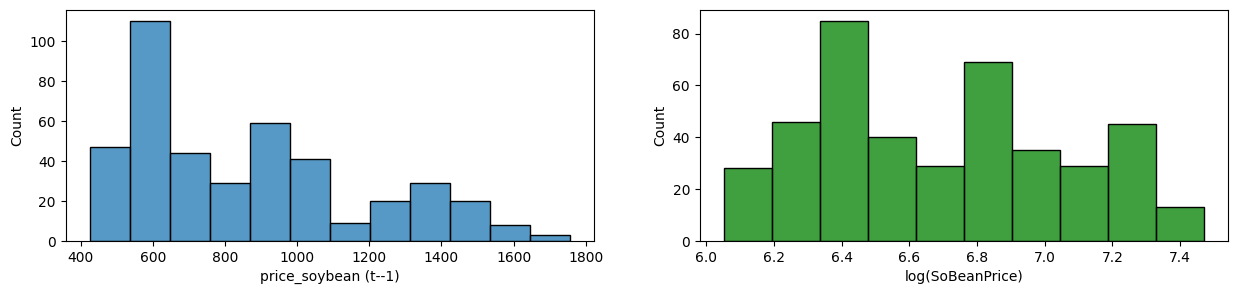

In [260]:
y_log = np.log(y)
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.histplot(y)
plt.subplot(1,2,2)
sns.histplot(y_log, color='green')
plt.xlabel("log(SoBeanPrice)")

In [296]:
X = rslt_df.drop(columns=['price_soybean (t-1)', 'date'], axis=1)
y = rslt_df['price_soybean (t-1)']


Text(0.5, 0, 'log(SoBeanPrice)')

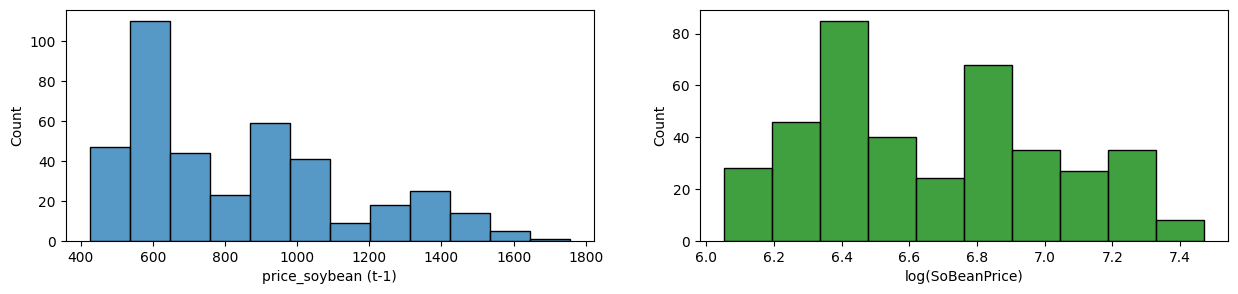

In [297]:
y_log = np.log(y)
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.histplot(y)
plt.subplot(1,2,2)
sns.histplot(y_log, color='green')
plt.xlabel("log(SoBeanPrice)")

In [323]:
X_train, X_eval, y_train_log, y_eval_log = train_test_split(X,y,test_size=0.3,random_state=42)
#X_train, X_eval, y_train_log, y_eval_log = train_test_split(X,y_log,test_size=0.3,random_state=42)

In [324]:
# Instanciate model
model_xgb = XGBRegressor(max_depth=10, n_estimators=300, learning_rate=0.1)

In [325]:
#pipe_xgb = make_pipeline(model_xgb)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer

rmse = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred)**0.5)
mape = make_scorer(lambda y_true, y_pred: mean_absolute_percentage_error(y_true, y_pred))
#mean_absolute_percentage_error(y_true, y_pred)
cross_val_score(model_xgb,X,y_log,cv=5,scoring=mape,n_jobs=-1).mean()

0.011669309490601396

In [327]:
model_xgb.fit(X_train, y_train_log,
        verbose=False,
        eval_set=[(X_train, y_train_log)],
        eval_metric=["rmse"],
        early_stopping_rounds=10)

/home/caromezach/.pyenv/versions/3.10.6/envs/Agricultural_Market_Predictions/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/caromezach/.pyenv/versions/3.10.6/envs/Agricultural_Market_Predictions/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [329]:

model_xgb.fit(X_train, y_train_log,
        verbose=False,
        eval_set=[(X_train, y_train_log)],
        eval_metric=["mape"],
        early_stopping_rounds=10)

# retrieve performance metrics
results = model_xgb.evals_result()
epochs = len(results['validation_0']["mape"])
x_axis = range(0, epochs)
results


/home/caromezach/.pyenv/versions/3.10.6/envs/Agricultural_Market_Predictions/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/caromezach/.pyenv/versions/3.10.6/envs/Agricultural_Market_Predictions/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


{'validation_0': OrderedDict([('mape',
               [0.8997999059594495,
                0.8107107944436882,
                0.7303913358316525,
                0.6579565274586316,
                0.592684550621019,
                0.5333930336826544,
                0.48051650978167565,
                0.43275326689443006,
                0.3897800242212275,
                0.35101067110734724,
                0.31583502428733917,
                0.28442084707239046,
                0.2562280542045724,
                0.23074866848785955,
                0.20791325295875218,
                0.18742557806013294,
                0.16879168470198497,
                0.15226619416975587,
                0.13751950326782486,
                0.12409955585402326,
                0.11229042425064122,
                0.10151402784102943,
                0.09194767076794448,
                0.0833966469573738,
                0.07562228225403556,
                0.06872605764481915,
         

In [317]:
results['validation_1']['mape']

[5.557746539656117,
 5.0059666815139705,
 4.513015751482204,
 4.068154004762682,
 3.6672082260157004,
 3.3070204646051304,
 2.9819527192408595,
 2.6883469470227257,
 2.424549096736132,
 2.1850543809705703,
 1.9724617292528075,
 1.7781678452422558,
 1.604853788100509,
 1.448222446057977,
 1.3063347874420557,
 1.1780488909087012,
 1.0613868995203373,
 0.9591934143928463,
 0.8656651318131585,
 0.7814064201071,
 0.7045876329962095,
 0.6364794842716983,
 0.5753118781659112,
 0.5203692321370289,
 0.47081581992511207,
 0.42602862140809816,
 0.38682727247852655,
 0.3508453425604736,
 0.31885067634959247,
 0.2900007463064696,
 0.2646198654066688,
 0.2408189119939924,
 0.22045808406829073,
 0.20314844233980378,
 0.1872638956001065,
 0.17259023284795688,
 0.16025330874701546,
 0.14923567026911558,
 0.13958447778508803,
 0.1304136519370366,
 0.12280047780640069,
 0.11620698854429597,
 0.11021685706490811,
 0.1053870367552441,
 0.10068551745542005,
 0.09708825985152256,
 0.0939666995005227,
 0.0910

KeyError: 'validation_1'

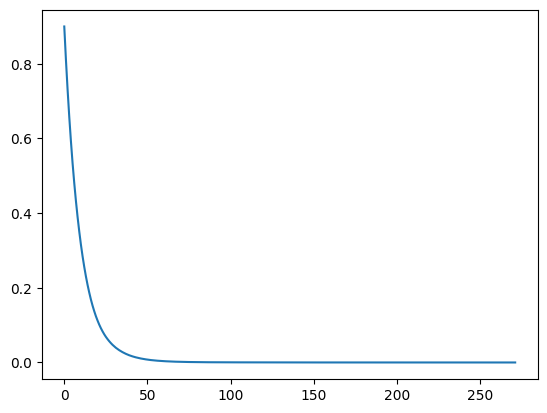

In [330]:
# plot rmsle loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mape'], label='Train')
ax.plot(x_axis, results['validation_1']['mape'], label='Val')
ax.legend(); plt.ylabel('RMSE (of log)'); plt.title('XGBoost Log Loss')

print("Best Validation Score", min(results['validation_1']['mape']))